In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier

from warnings import simplefilter
simplefilter("ignore")

In [22]:
# Option to display all columns
pd.set_option('display.max_columns', None)
data=pd.read_csv('C:/Users/saiba/OneDrive/Desktop/newML/SIP/data.csv/data.csv')
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [23]:
data.shape

(6819, 96)

In [24]:
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 



Null values and duplicate rows


In [25]:
data.isna().sum().any()

False

In [26]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [27]:
data.duplicated().sum()  #There are no null values and no duplicate rows in the dataset.


0

3. Exploratory Data Analysis¶



3.1 Is the Data Balanced or Imbalanced?¶


In [29]:
#Let's have a look at the target variable to see whether it is balanced or not.
val=data['Bankrupt?'].value_counts().reset_index(name='count')
val

Bankrupt?  count
0          0   6599
1          1    220

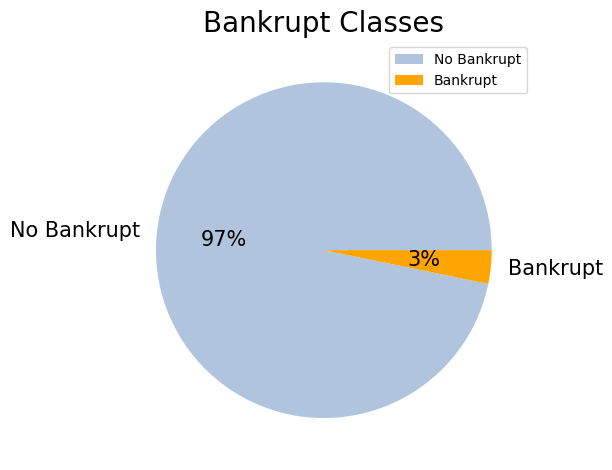

In [30]:
def label_function(val):
    return f'{val:.0f}%'

labels = ['No Bankrupt','Bankrupt']

val.plot(x='Bankrupt?',y='count',kind='pie',autopct=label_function,
                textprops={'fontsize':15},labels=labels,colors=['lightsteelblue','orange'])

plt.ylabel('')
plt.title('Bankrupt Classes',fontsize=20)

plt.tight_layout()

As shown in the plot, the values in the Bankrupt? column are highly inbalanced. 
Therefore, in order to rise the accuracy of the results I will probably have to resample the data
 to get more balanced classes in the target variable (something around a 50-50 split between the bankrupt classes)



3.2 Outliers


Let's have a look at the boxplots of the predictors to see whether they have outliers or not

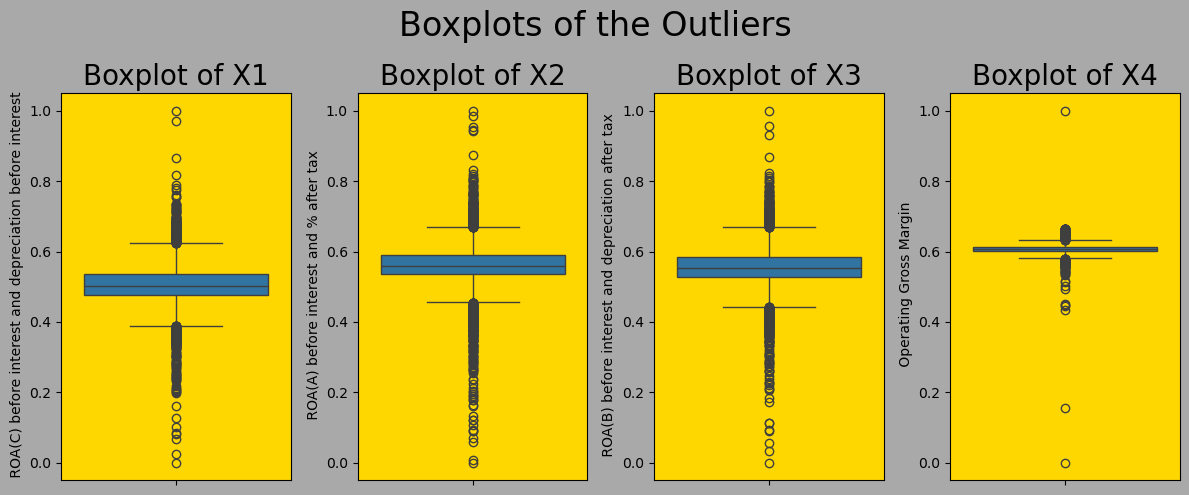

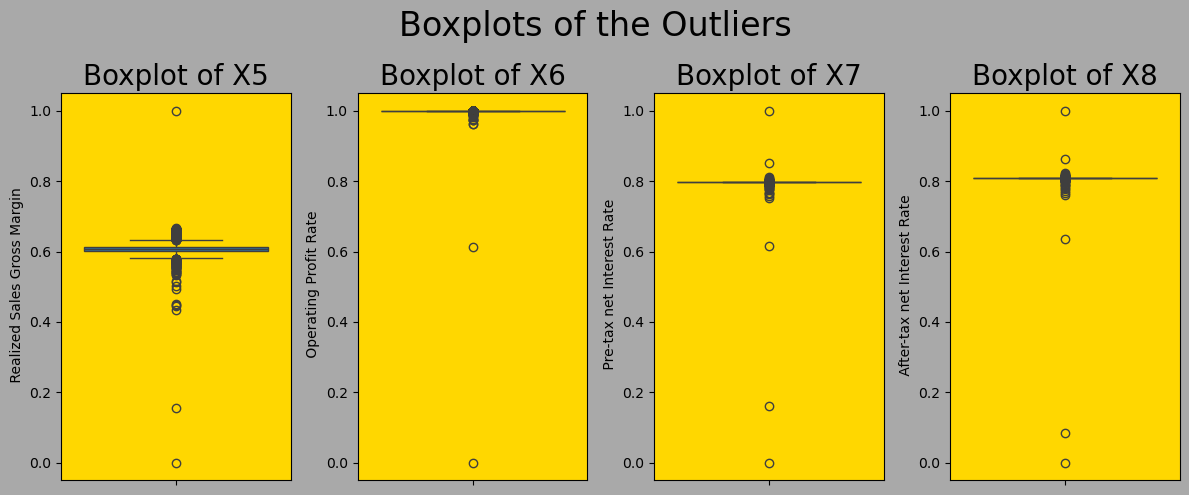

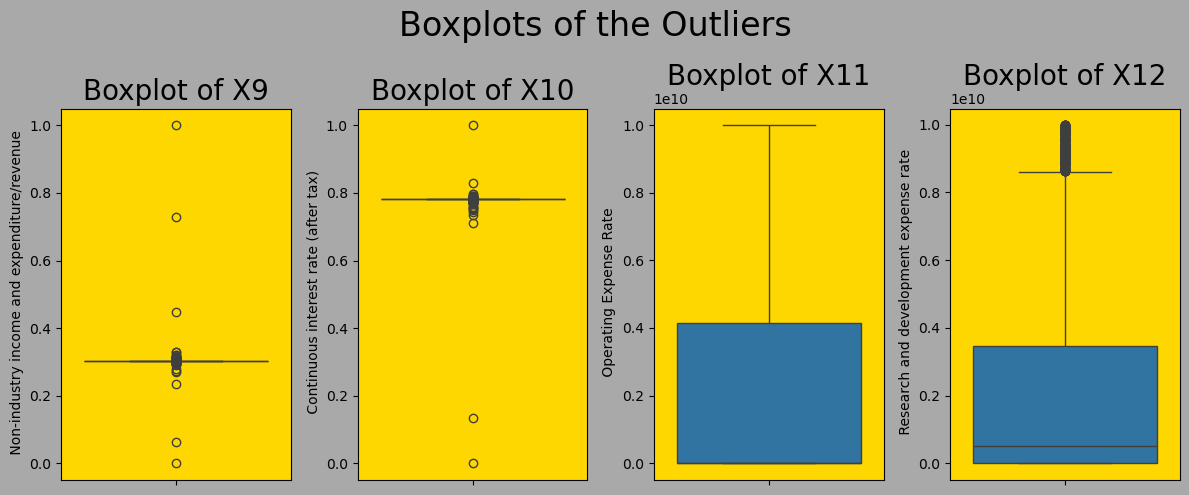

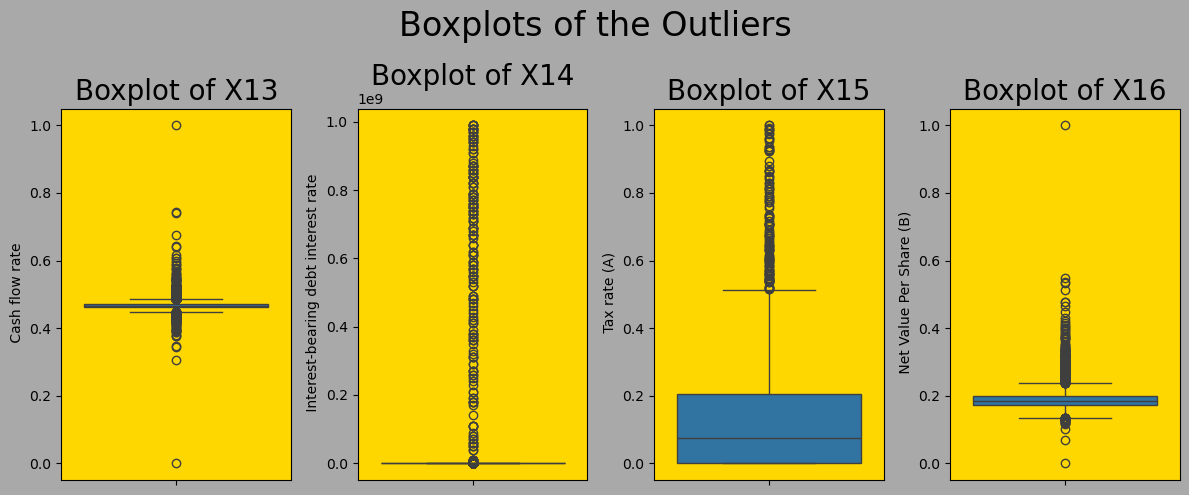

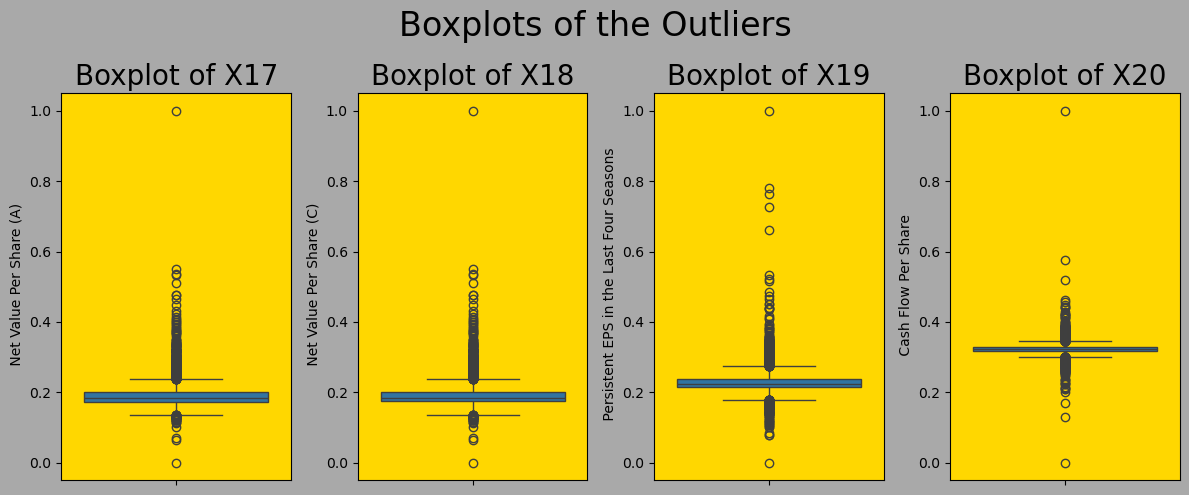

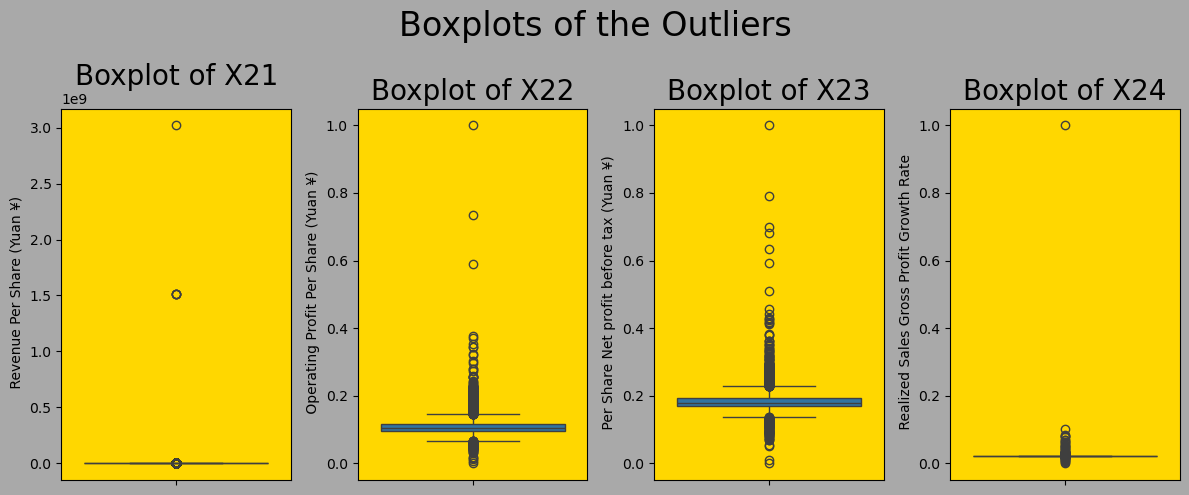

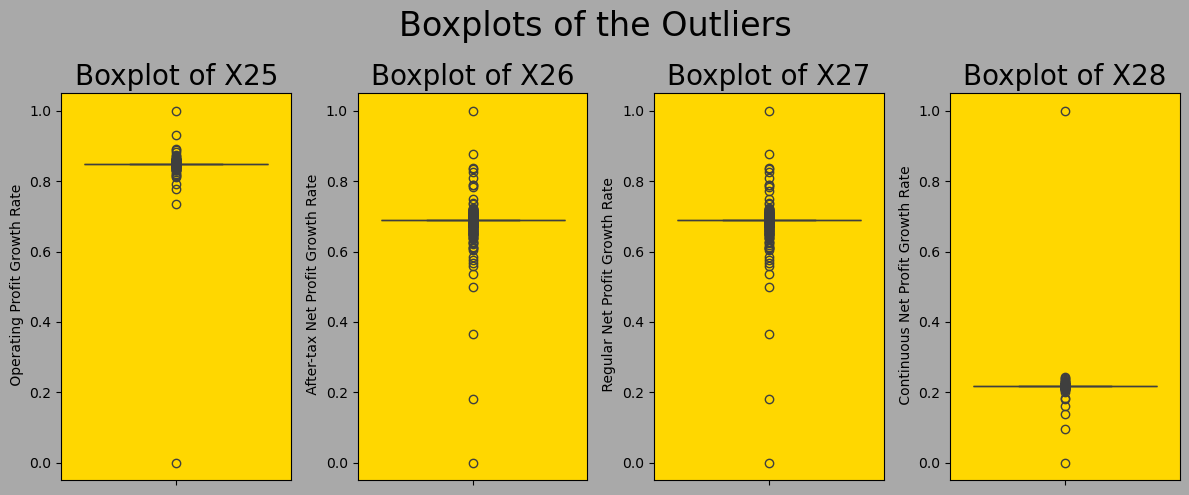

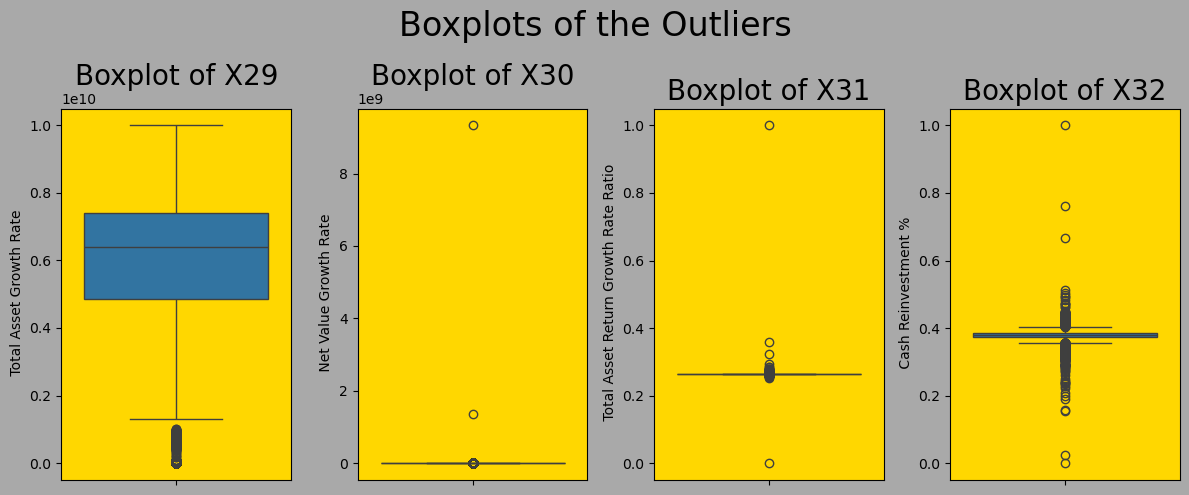

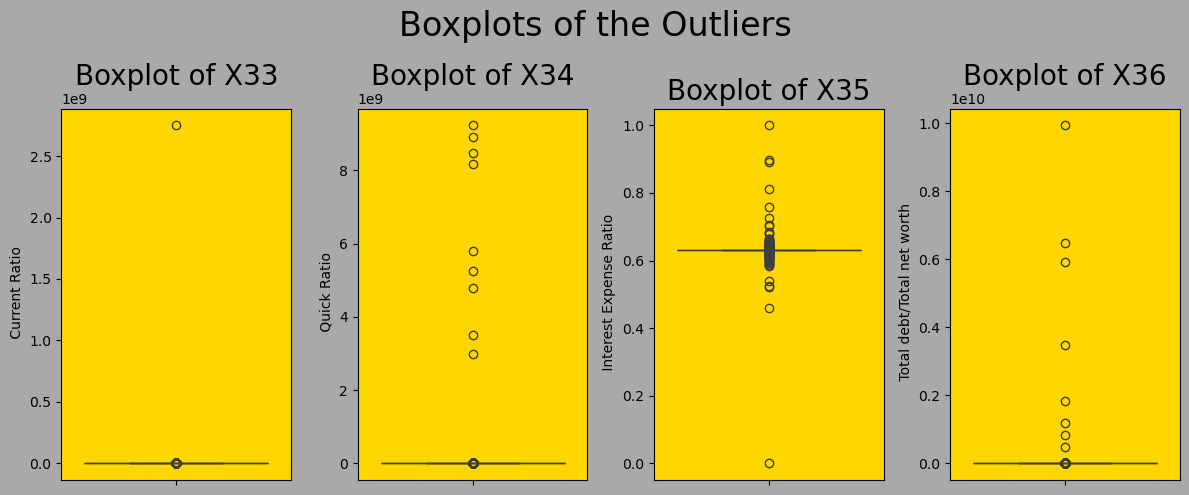

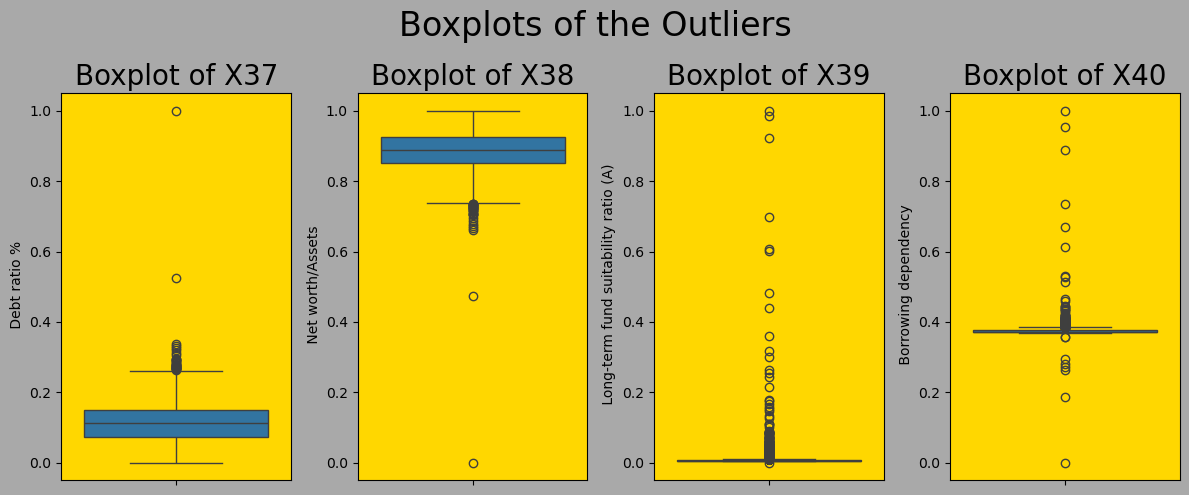

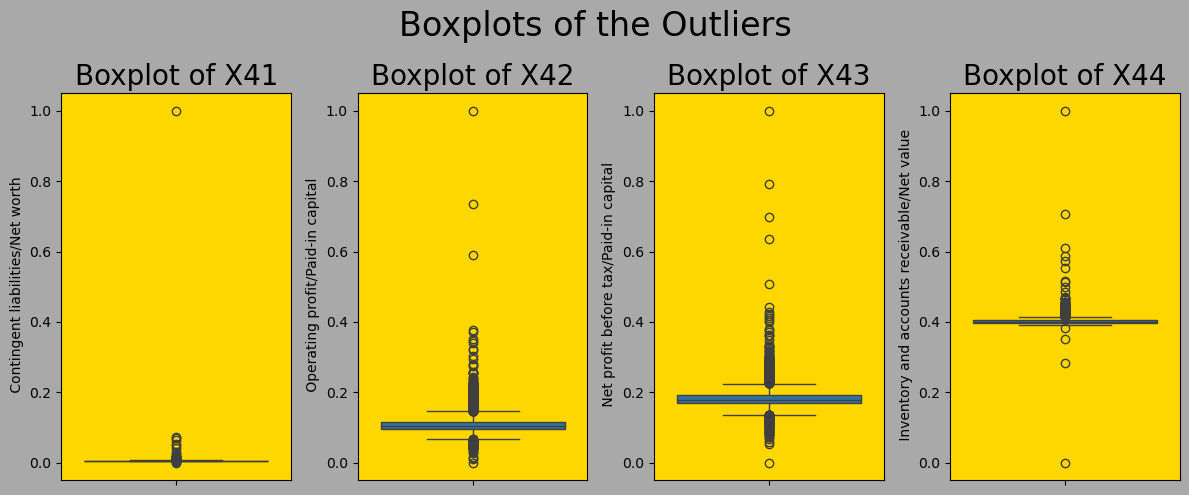

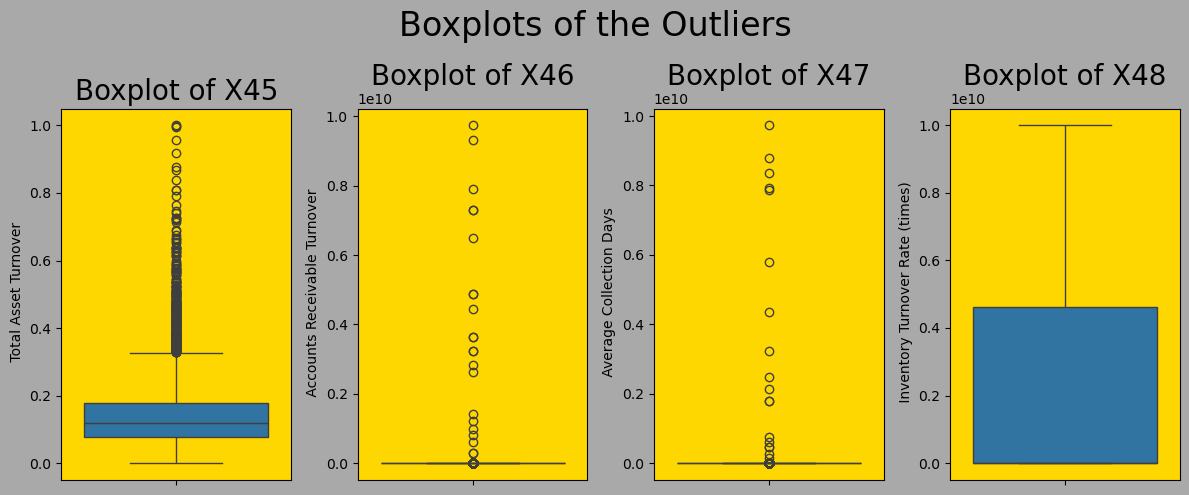

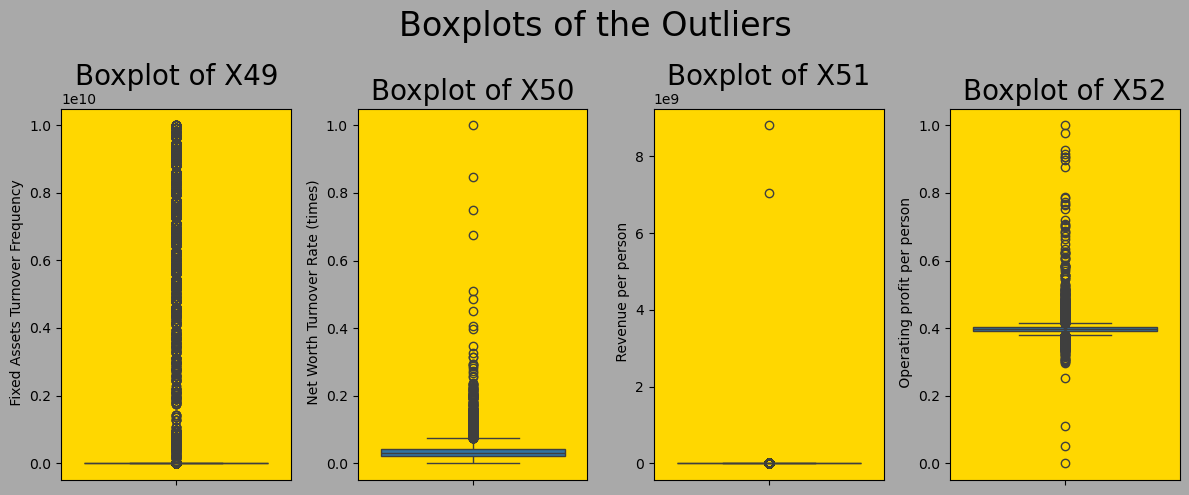

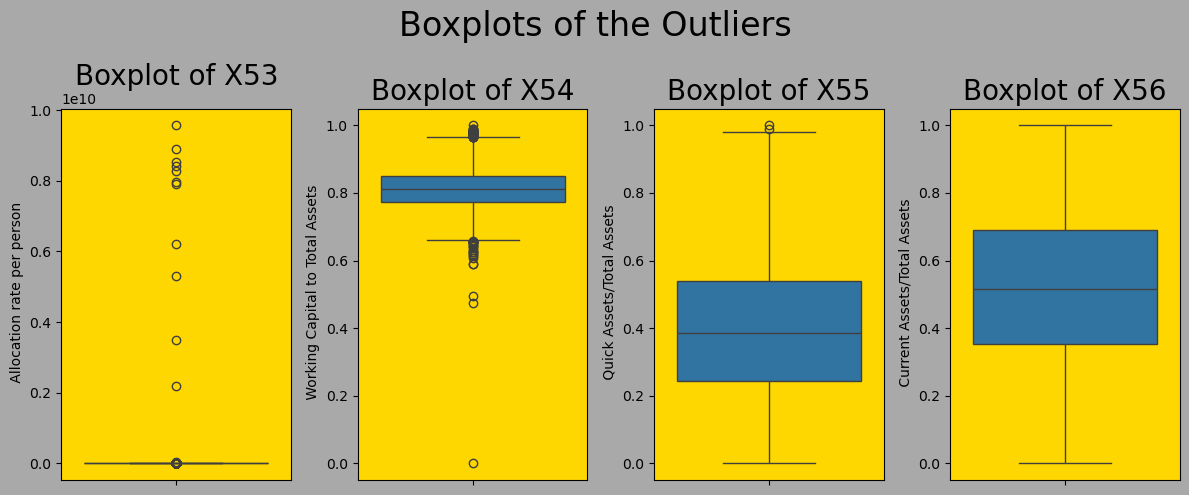

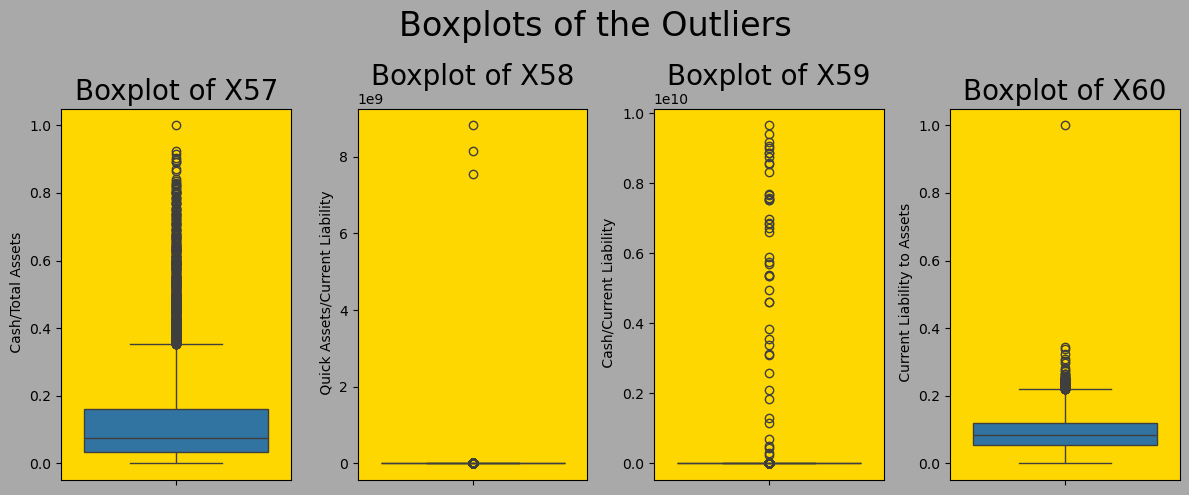

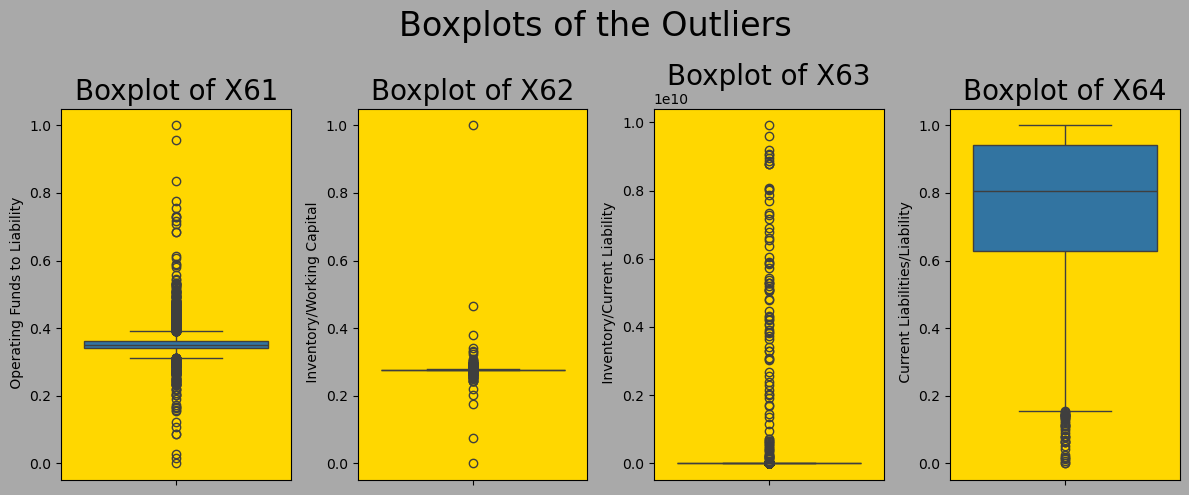

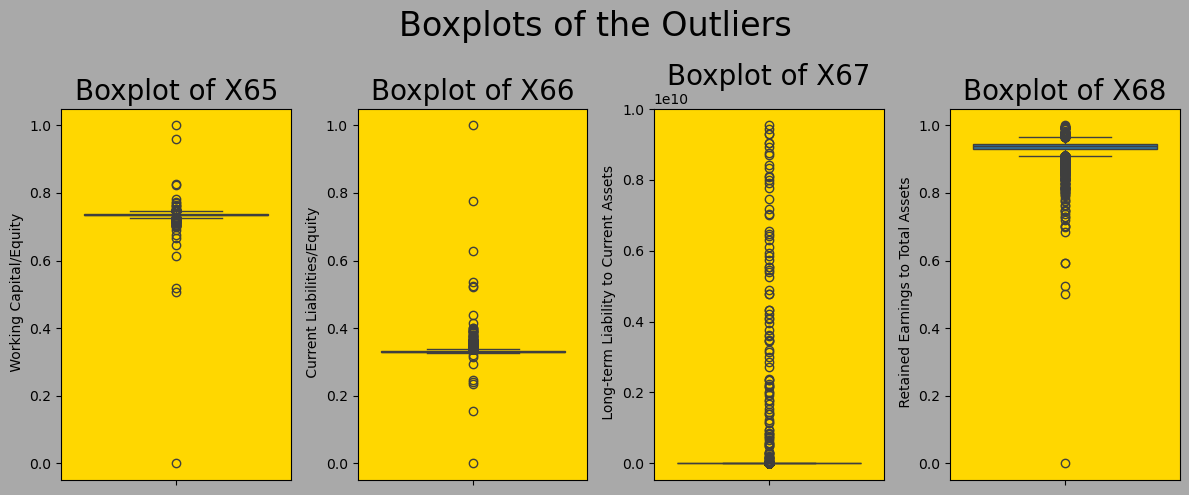

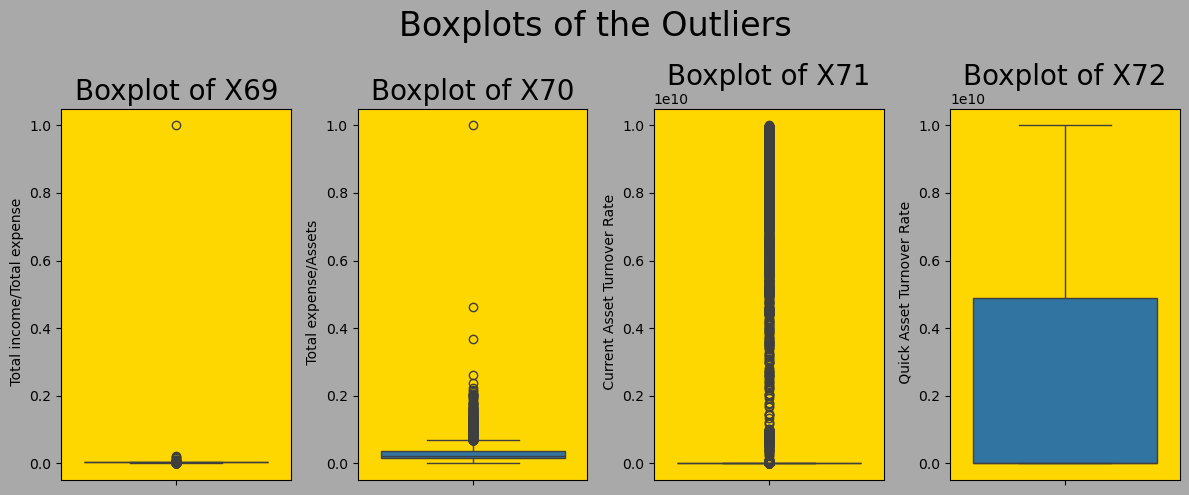

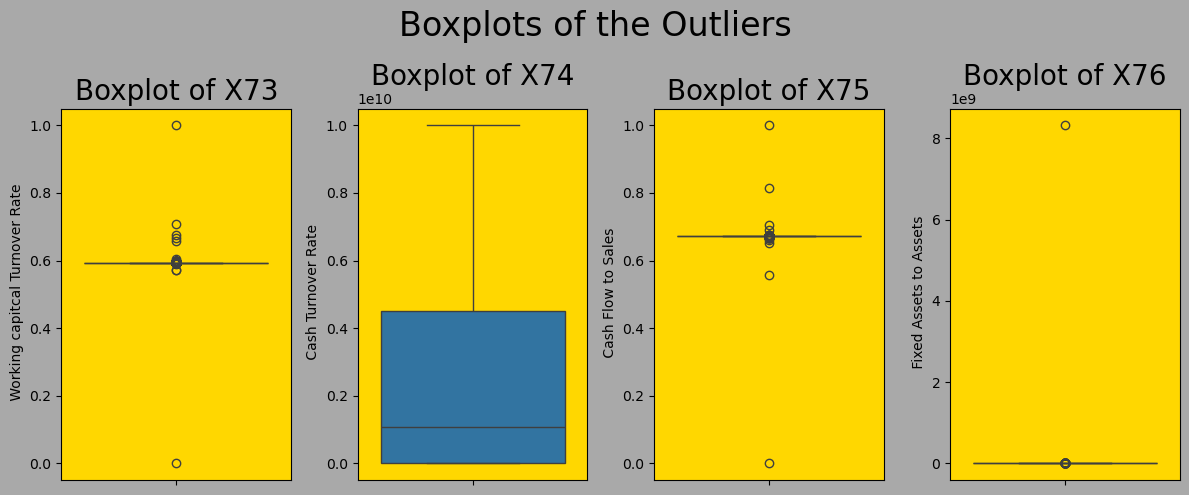

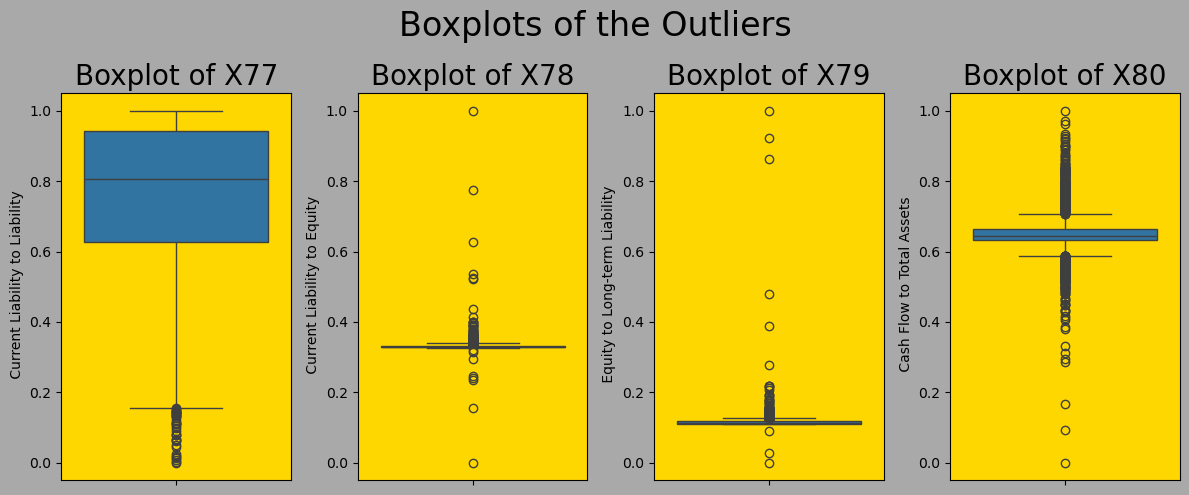

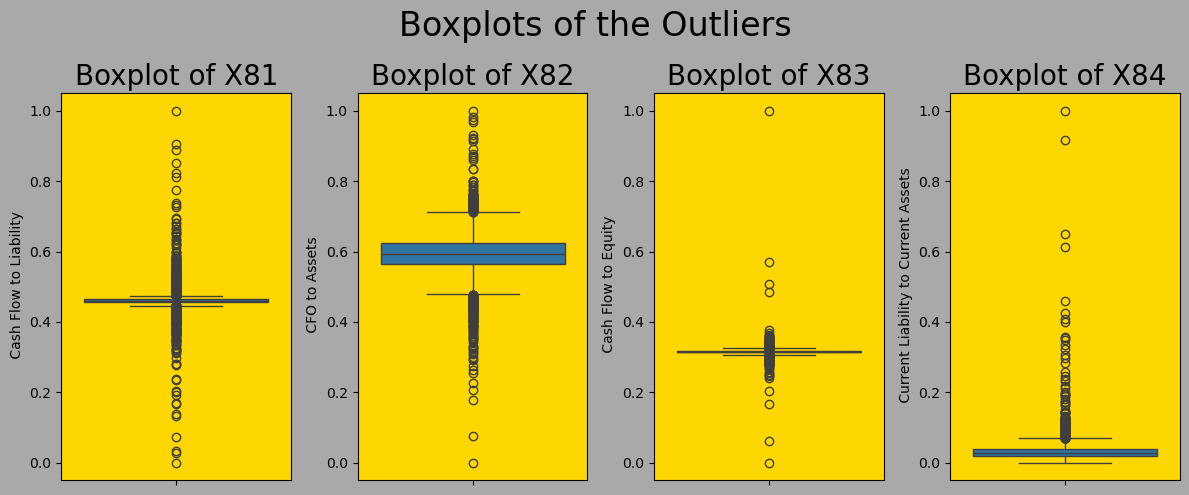

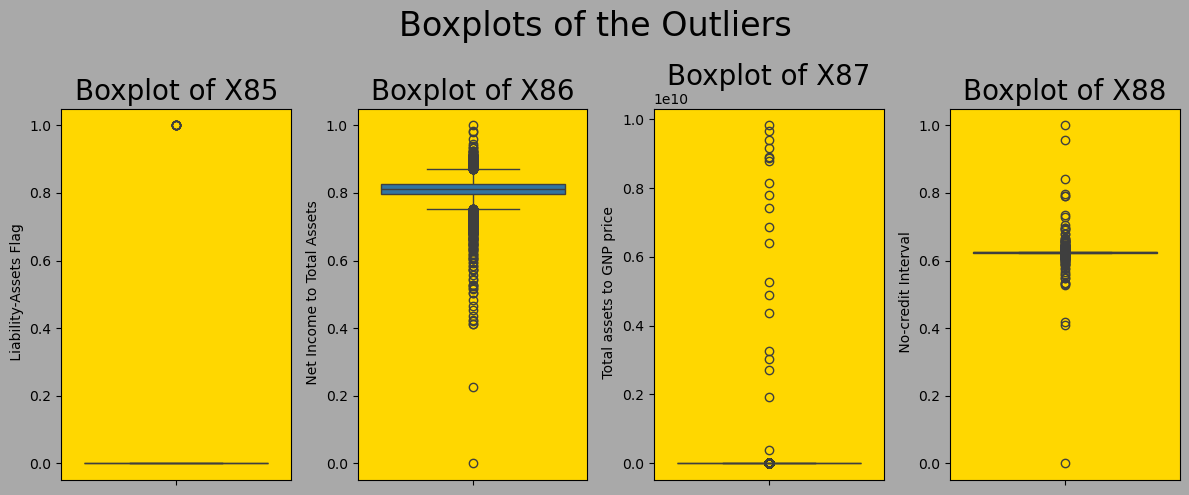

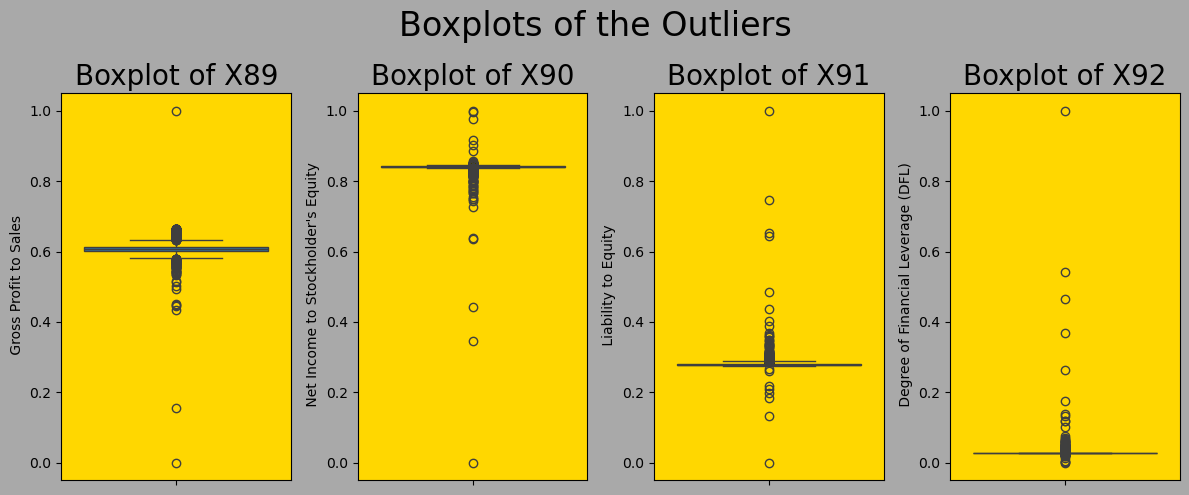

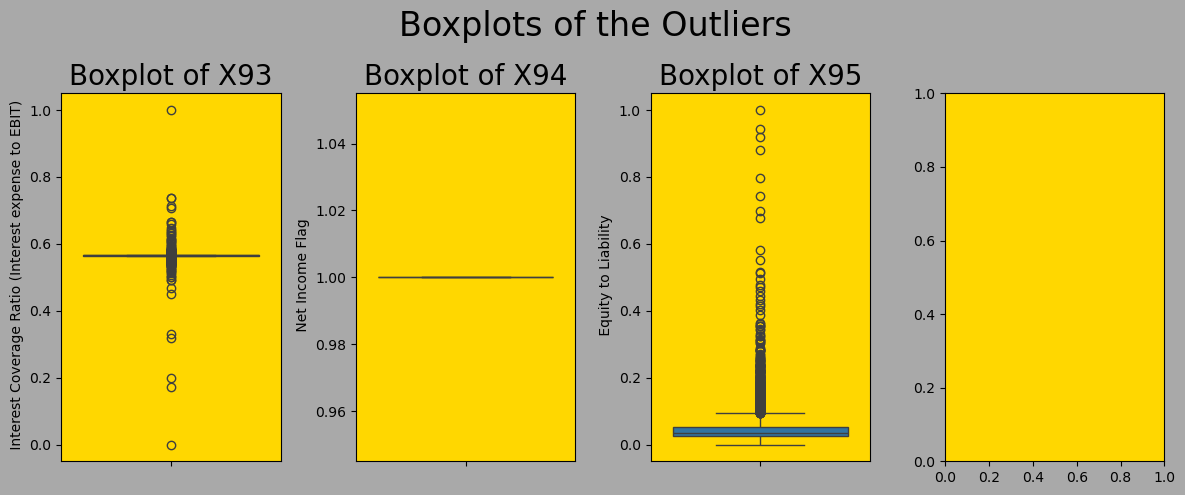

In [31]:
features = data.drop('Bankrupt?',axis=1).columns

for i in range(24):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(data[features[i*4]],ax=ax1)
    ax1.set_title(f'Boxplot of X{i*4+1}',fontsize=20)
    ax1.set_facecolor('gold')
    ax2 = sns.boxplot(data[features[i*4+1]],ax=ax2)
    ax2.set_title(f'Boxplot of X{i*4+2}',fontsize=20)
    ax2.set_facecolor('gold')
    ax3 = sns.boxplot(data[features[i*4+2]],ax=ax3)
    ax3.set_title(f'Boxplot of X{i*4+3}',fontsize=20)
    ax3.set_facecolor('gold')
    if i < 23:
        ax4 = sns.boxplot(data[features[i*4+3]],ax=ax4)
        ax4.set_title(f'Boxplot of X{i*4+4}',fontsize=20)
        ax4.set_facecolor('gold')
    else:    
        ax4.set_facecolor('gold')
    
    fig.suptitle("Boxplots of the Outliers",fontsize=24)    
    
    plt.tight_layout()
    fig.set_facecolor('darkgrey')



With a few exceptions, the X-variables have a large number of outliers.



3.3 Correlations

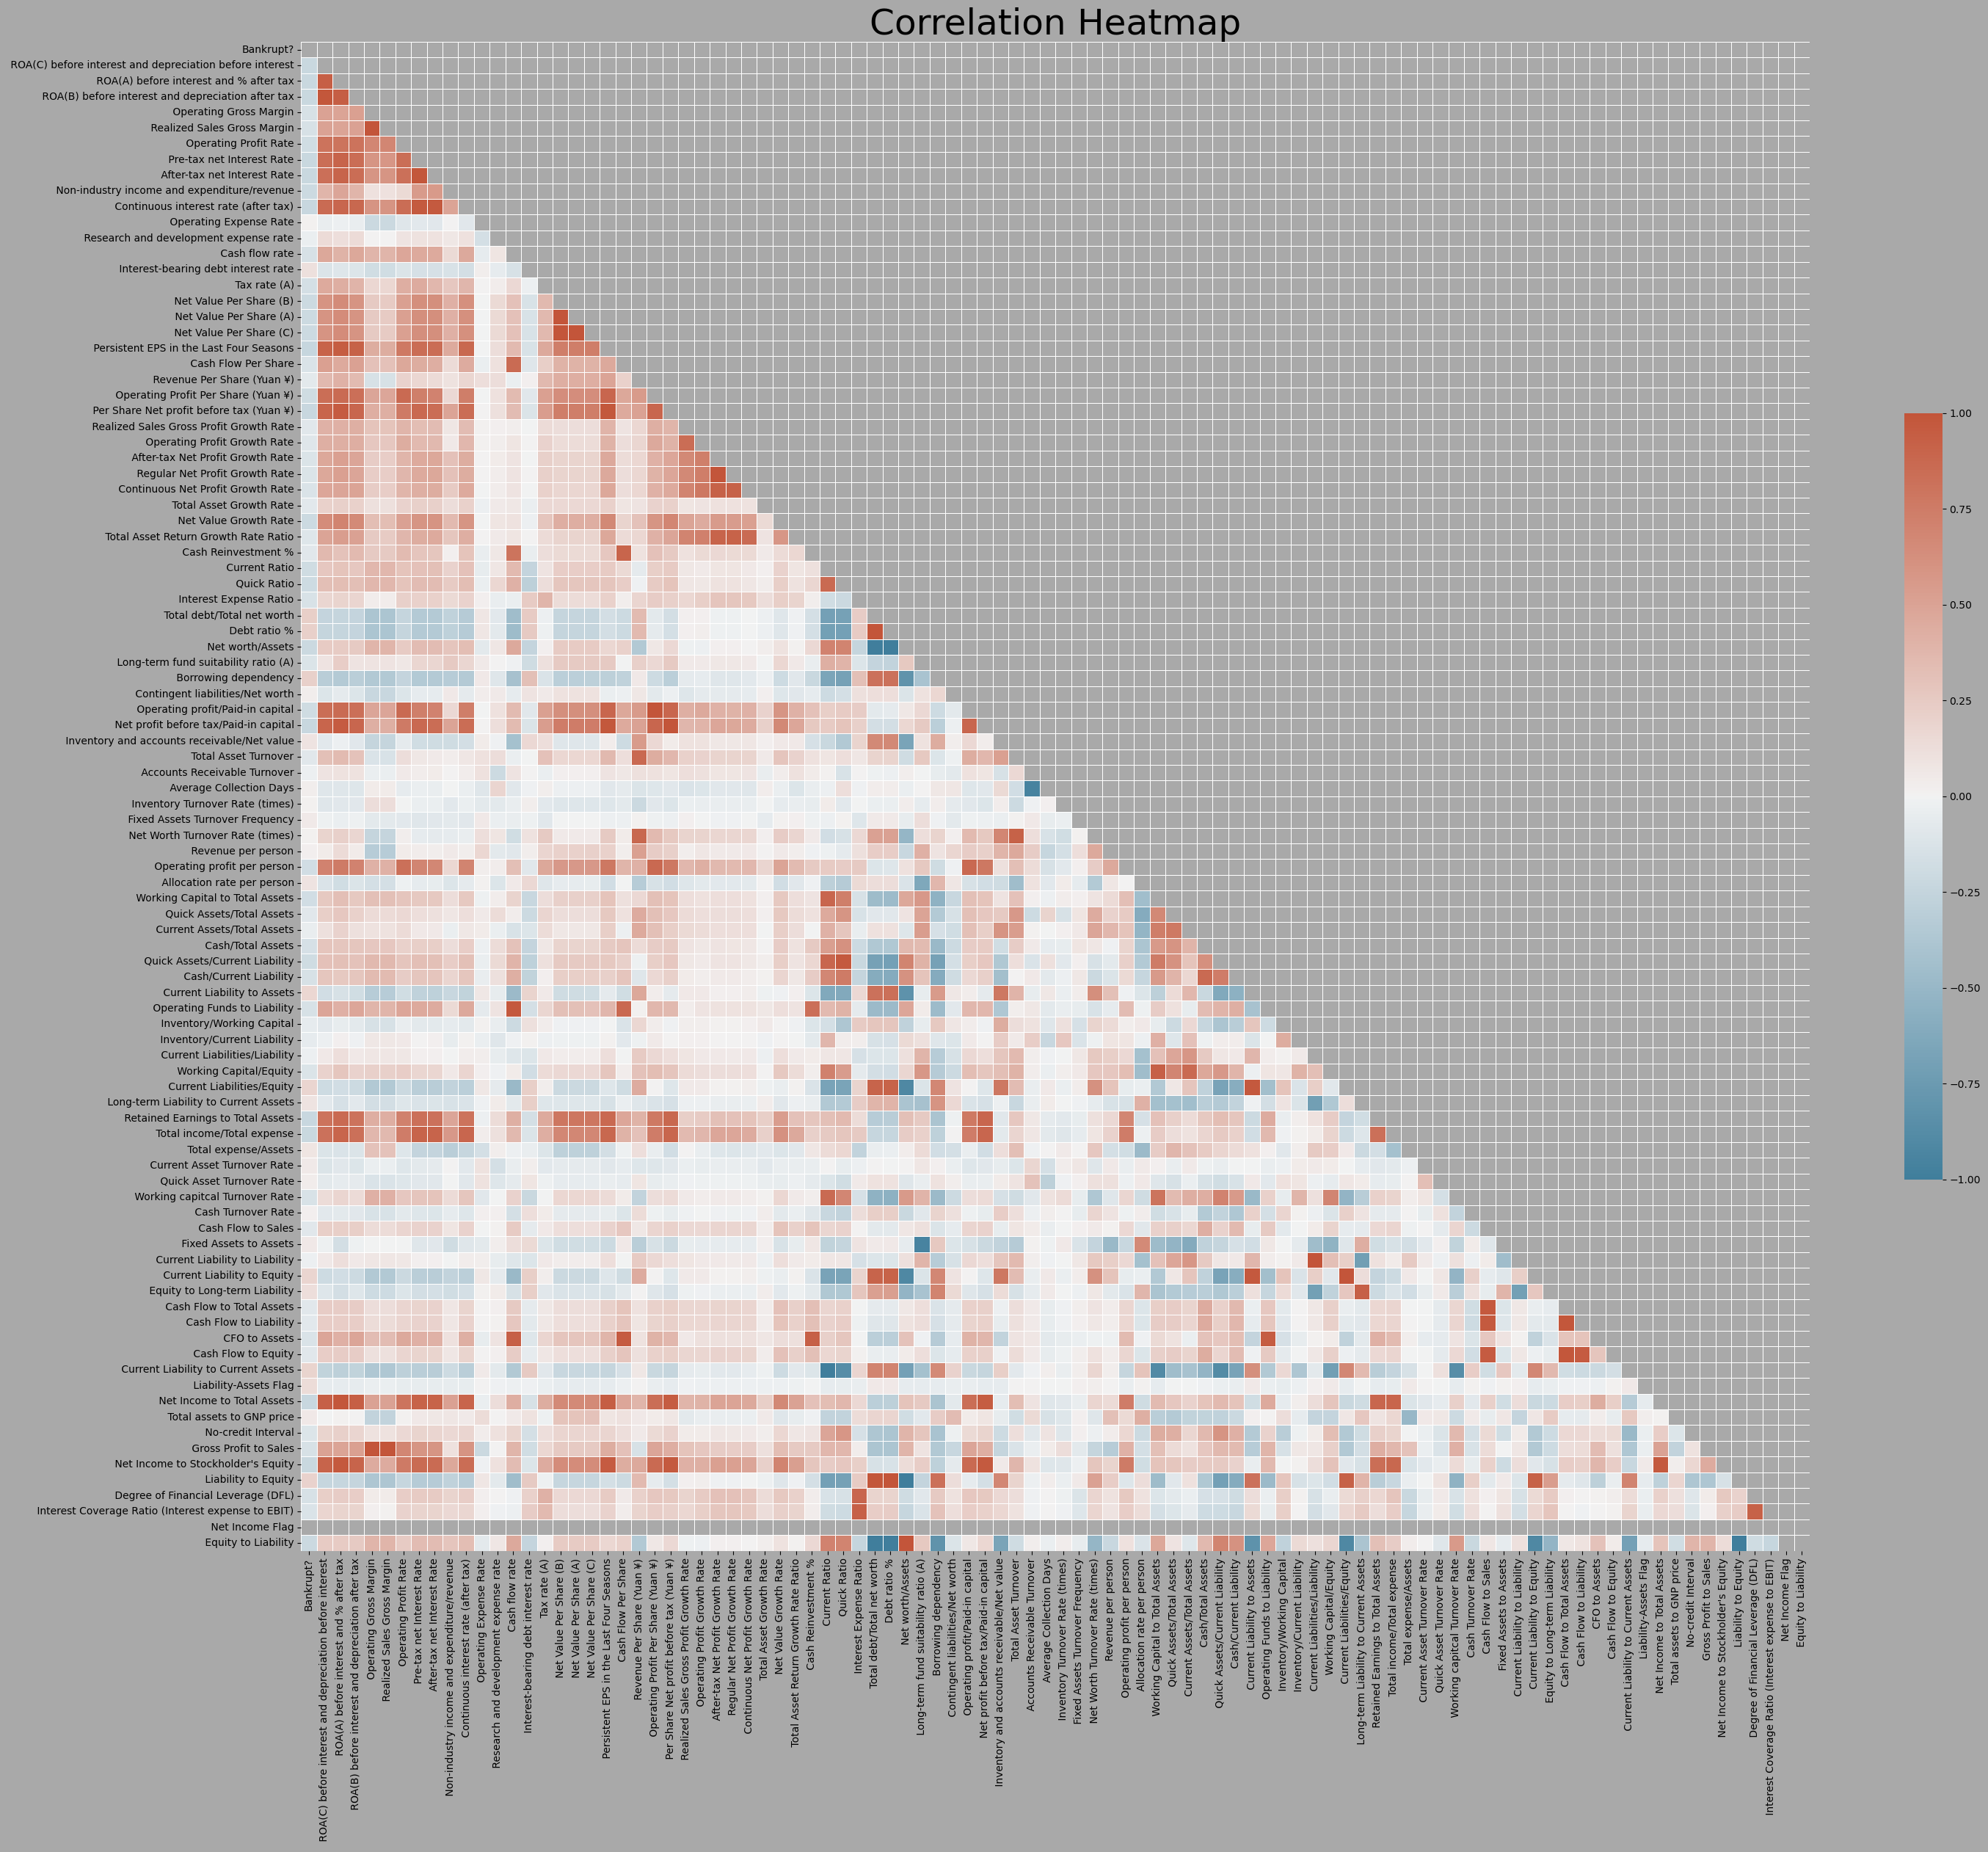

In [32]:
f,ax = plt.subplots(figsize=(30, 25))

mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(mat,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

plt.title('Correlation Heatmap',fontsize=35)

plt.tight_layout()
plt.gcf().patch.set_facecolor('darkgrey')
plt.gca().set_facecolor('darkgrey')

plt.show()



There are some strong correlation between the variables. Let's have a look at those couples of features with either R > 0.9 or R < -0.9

In [33]:
list1 = features
list2 = features
list_int = []
count = 1

for col1 in list1:
    list_int.append(col1)
    for col2 in list2:
        if col2 not in list_int:
            R_corr = data.corr().loc[col1,col2]
            if R_corr > 0.9 or R_corr < -0.9:
                print(count,'.  ',col1,' -- ',col2,';  R = {:.3f}'.format(R_corr))   
                count += 1  

1 .    ROA(C) before interest and depreciation before interest  --   ROA(A) before interest and % after tax ;  R = 0.940
2 .    ROA(C) before interest and depreciation before interest  --   ROA(B) before interest and depreciation after tax ;  R = 0.987
3 .    ROA(A) before interest and % after tax  --   ROA(B) before interest and depreciation after tax ;  R = 0.956
4 .    ROA(A) before interest and % after tax  --   Net Income to Total Assets ;  R = 0.962
5 .    ROA(B) before interest and depreciation after tax  --   Net Income to Total Assets ;  R = 0.912
6 .    Operating Gross Margin  --   Realized Sales Gross Margin ;  R = 1.000
7 .    Operating Gross Margin  --   Gross Profit to Sales ;  R = 1.000
8 .    Realized Sales Gross Margin  --   Gross Profit to Sales ;  R = 1.000
9 .    Operating Profit Rate  --   Pre-tax net Interest Rate ;  R = 0.916
10 .    Operating Profit Rate  --   Continuous interest rate (after tax) ;  R = 0.916
11 .    Pre-tax net Interest Rate  --   After-tax net



At least one of the elements in each pair of features with a high value of the Pearson coefficient R will have to be dropped.


4. Feature Engineering


4.1 Outliers Capping


Outliers are data points that stand out significantly from the rest of the data. They can be extremely high or low values compared to the other observations and can be caused by measurement errors, natural variations in the data, or even unexpected discoveries. It is well-known that the outliers in a dataset (that we want to study via classification or regression techniques) can result in a lower predictive performance; thus they need to be dealt with.

The outliers will be capped by setting (for each column) lower and upper thresholds, that are defined in terms of the first and third quartiles of the data.
The capping procedure has to be carried out on the float variables only. The variables of integer type must be excluded from this procedure

In [34]:
# Function for outliers capping
def outlier_imputer(data,features):
    
    data_out = data.copy()
    
    for column in features:        
        
        # First define the first and third quartiles
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL = (Q1 - 1.5 * IQR)
        higherL = (Q3 + 1.5 * IQR)
        
        # Impute 'left' outliers
        data_out.loc[data_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        data_out.loc[data_out[column] > higherL,column] = higherL
        
    return data_out 

# Outliers capping is carried out on the float columns only
data_in     = data.select_dtypes(include='float')
features_in = data_in.columns

capped_data = outlier_imputer(data_in,features_in)

In [35]:
# Integer-type columns are concatenated to the capped dataset
data_int = data.select_dtypes(include='int')

data2 = pd.concat([capped_data,data_int],axis=1)

data2.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.781314             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.781314             2.361297e-04   
3                               0.781314             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.178548   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

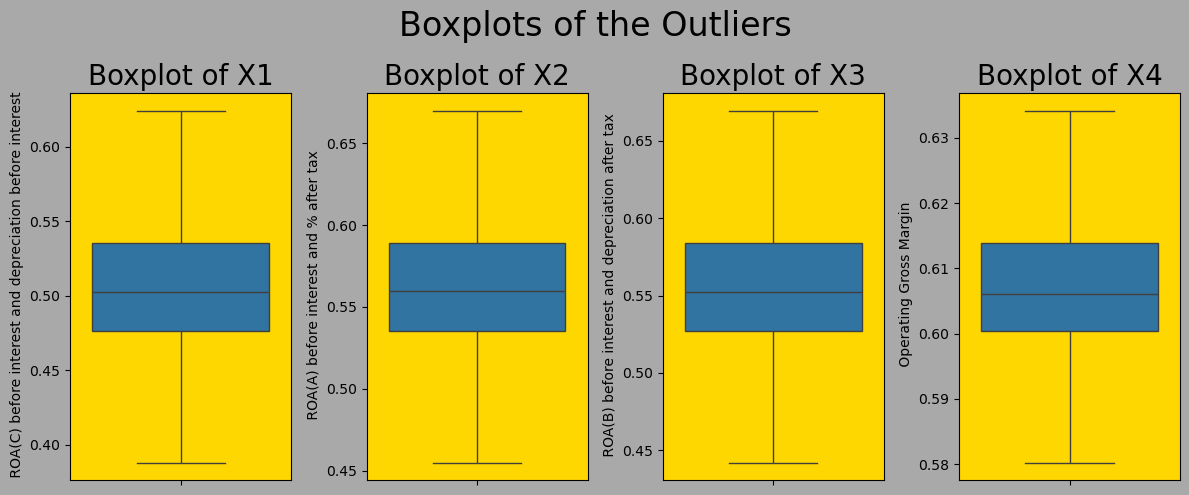

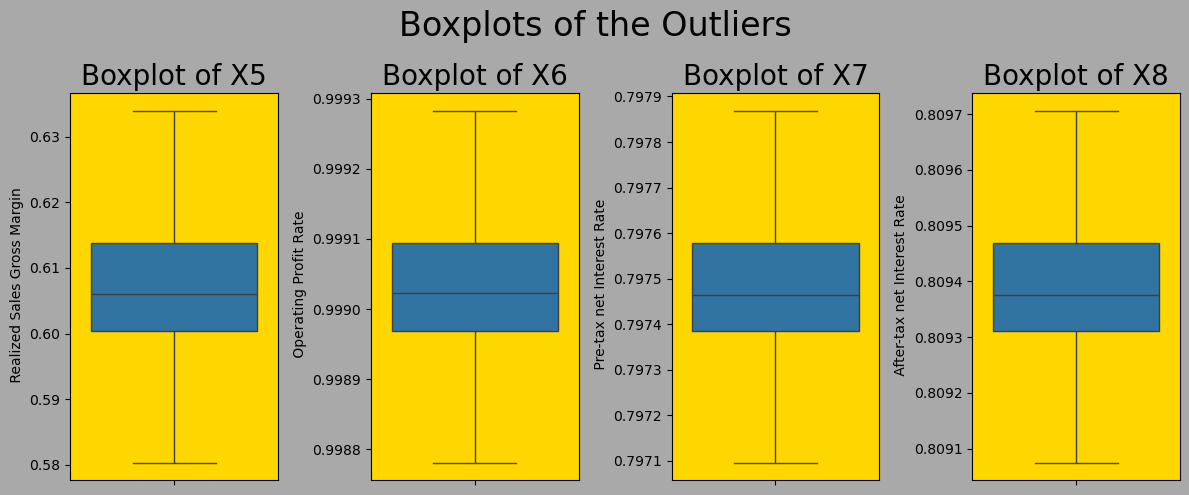

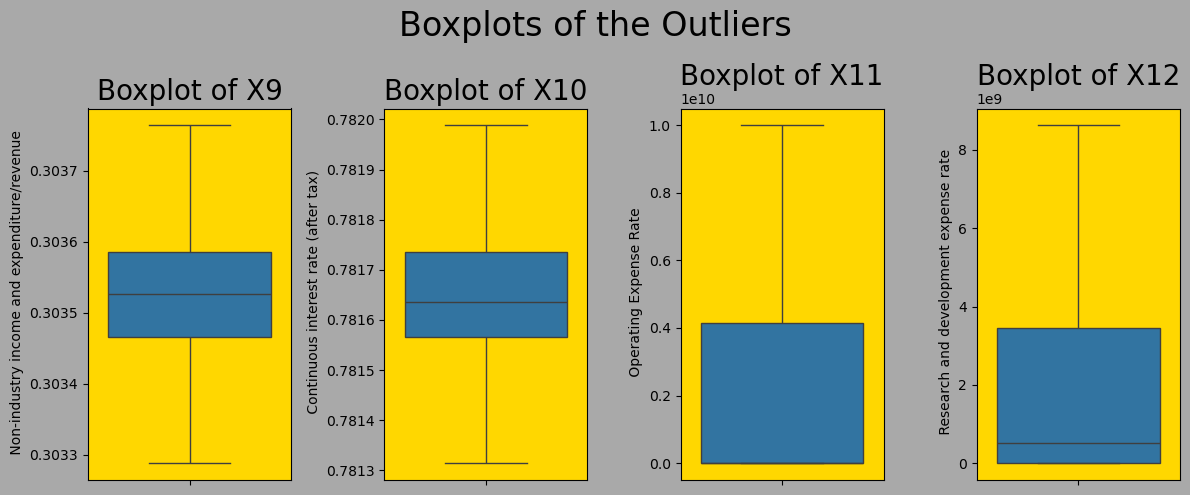

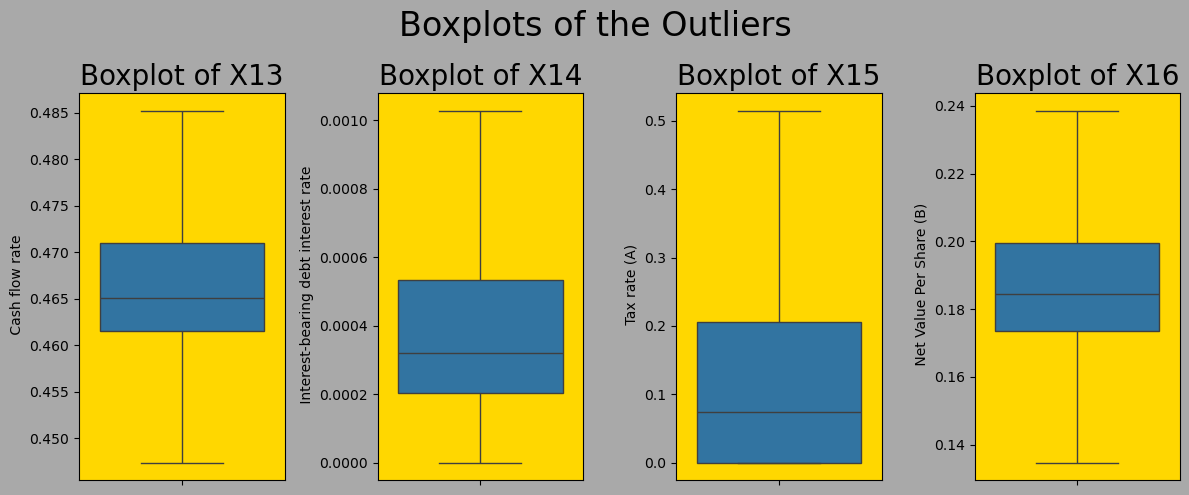

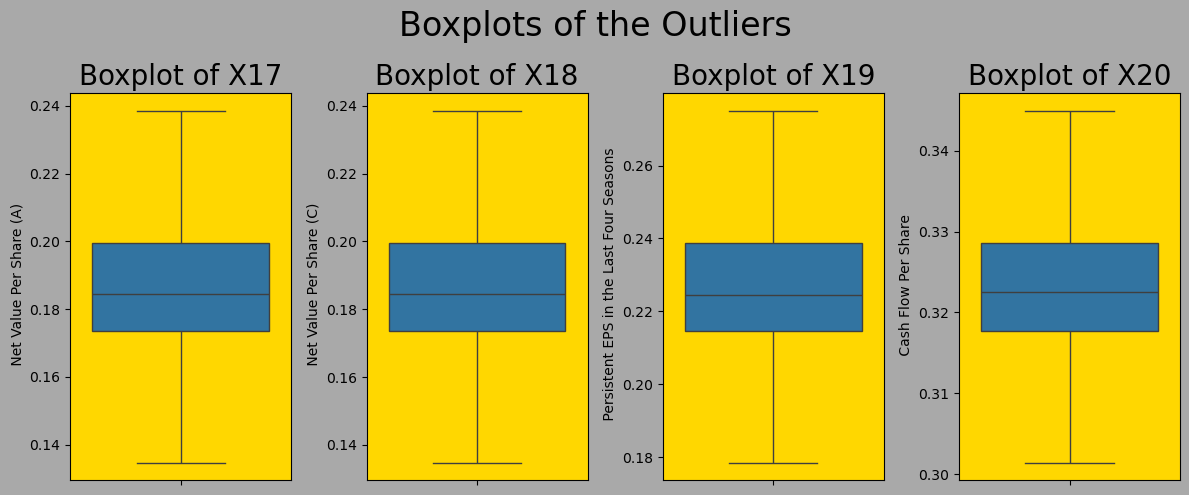

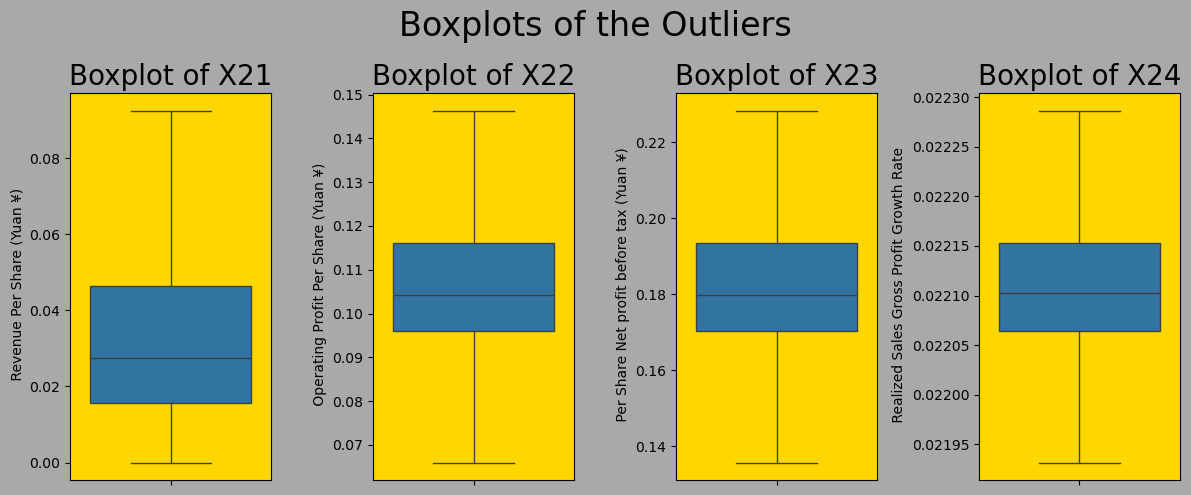

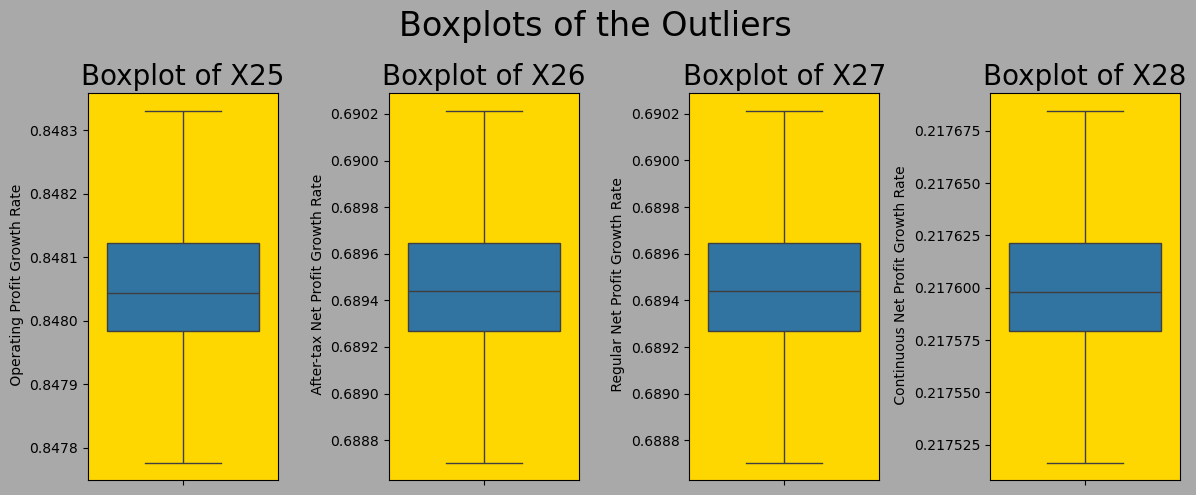

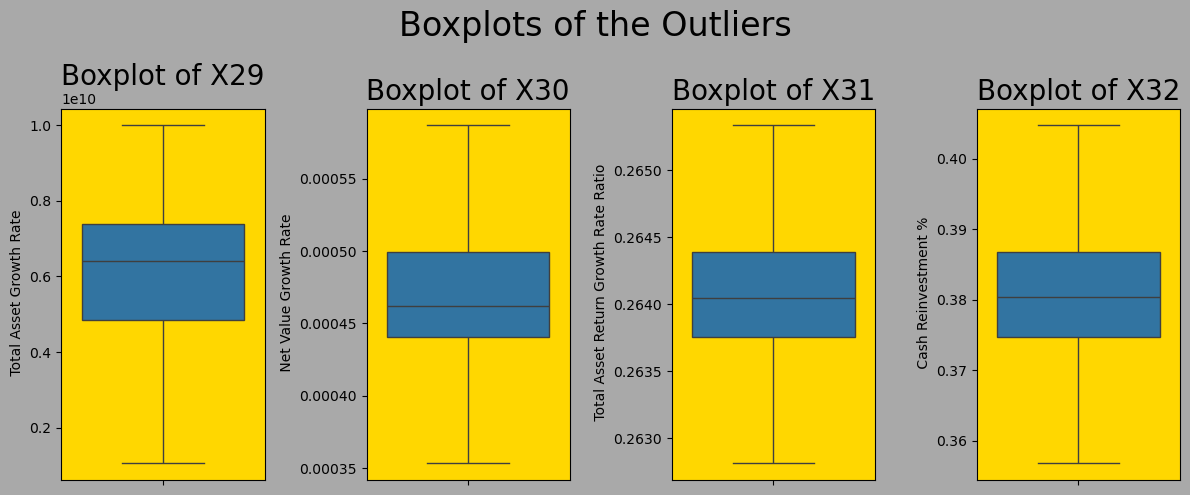

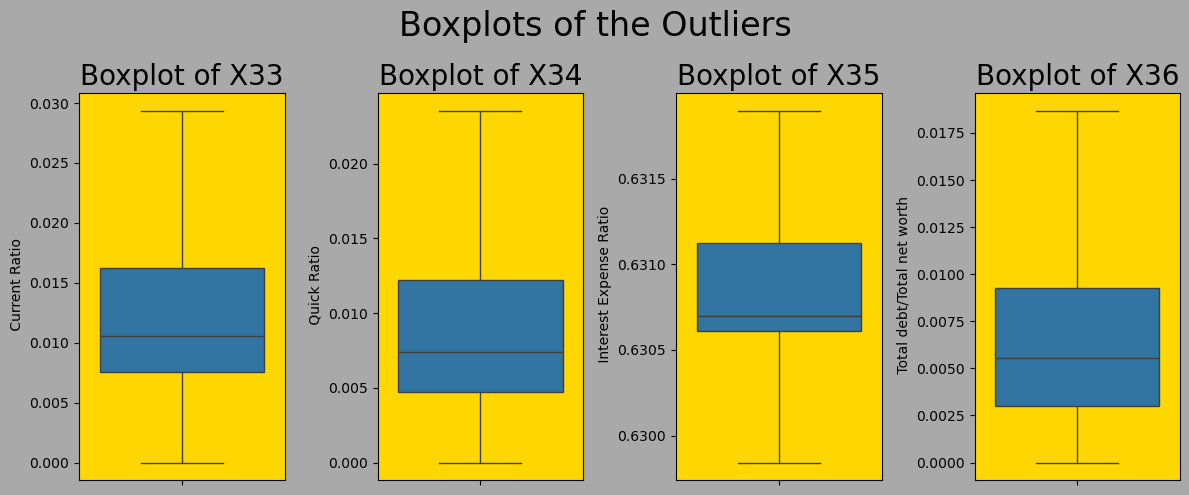

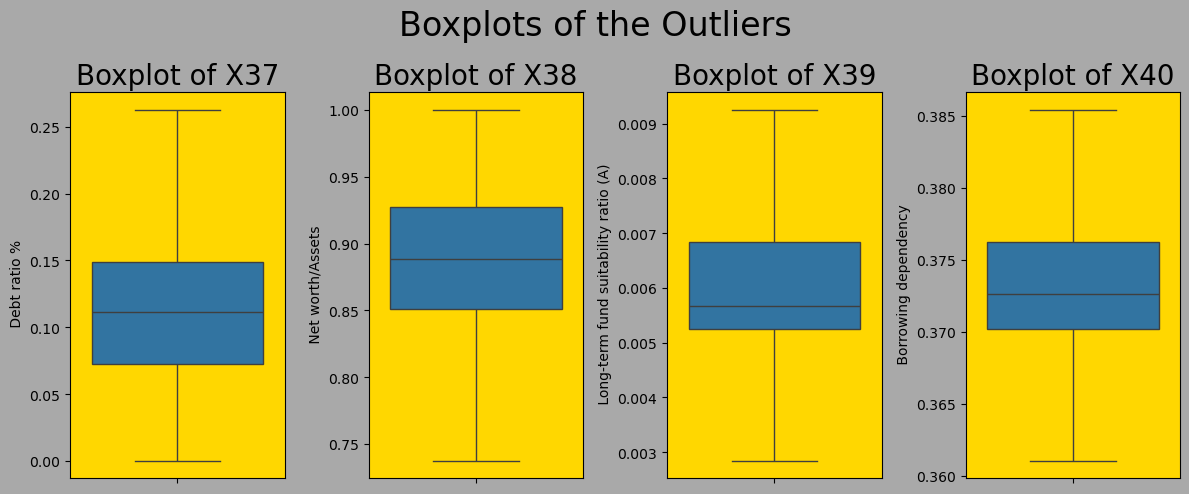

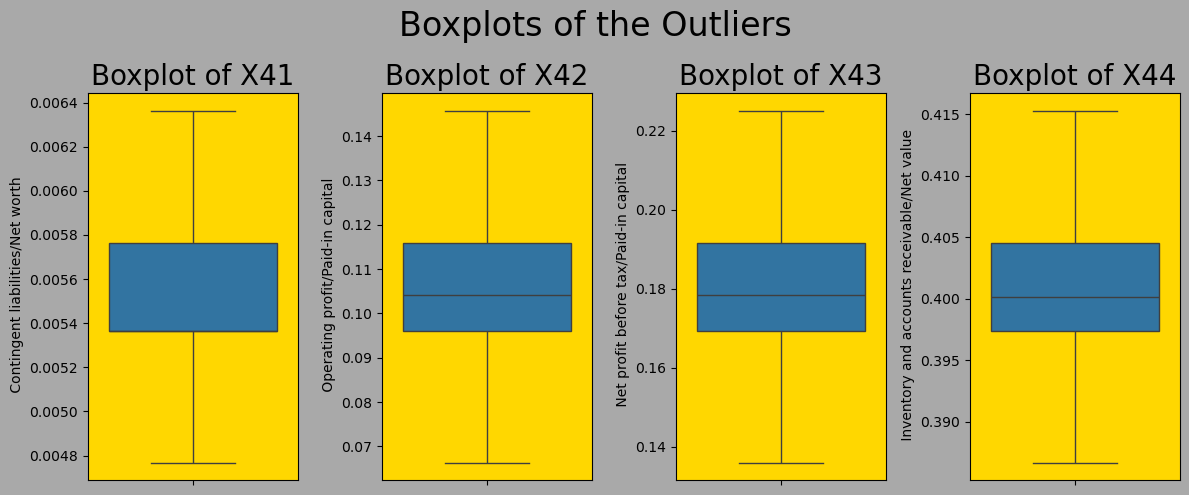

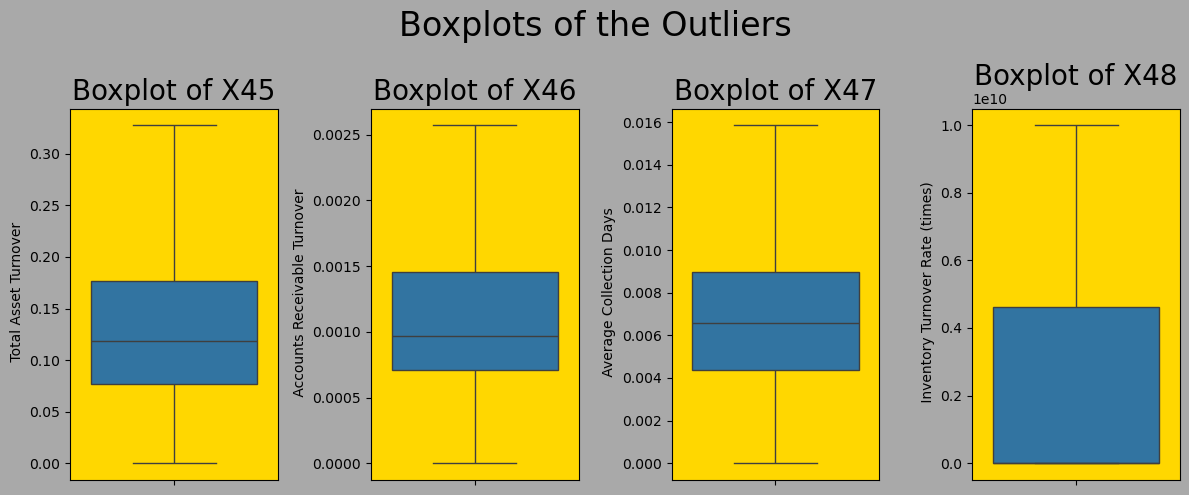

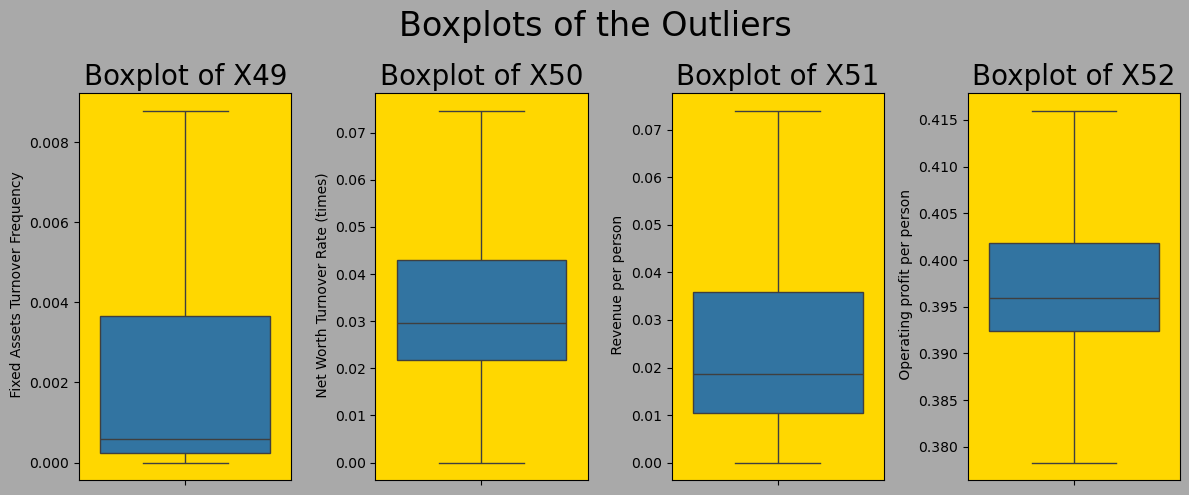

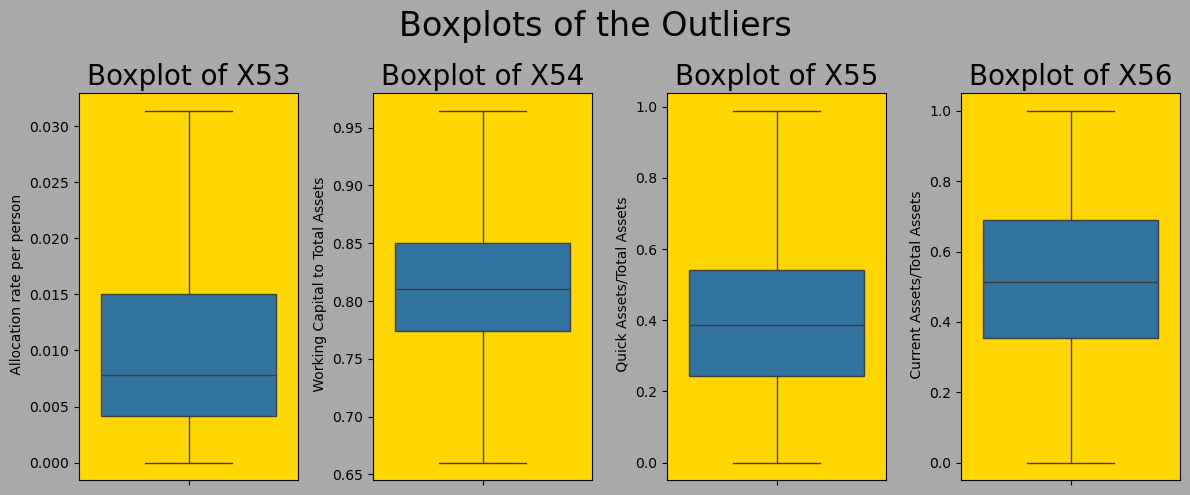

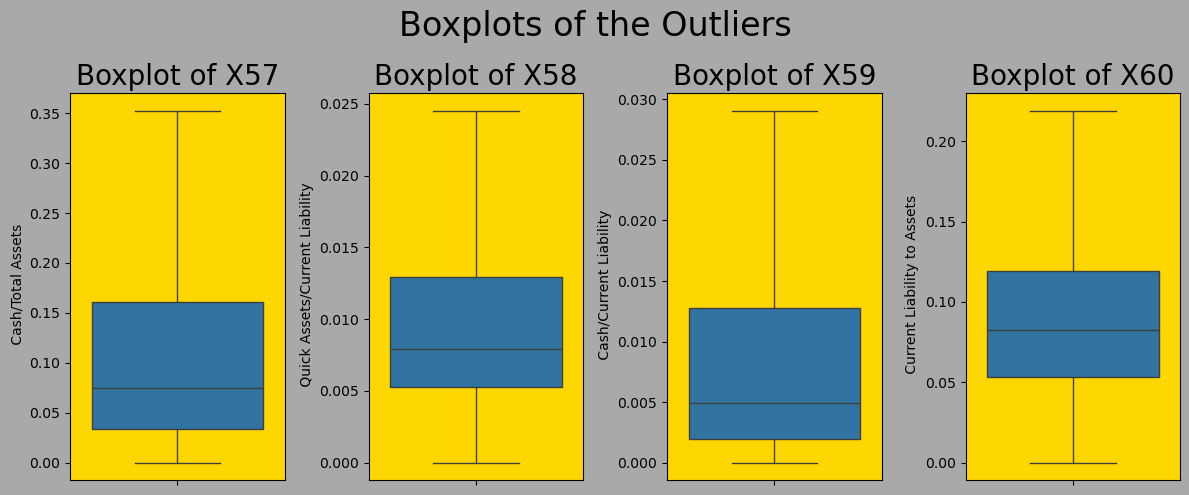

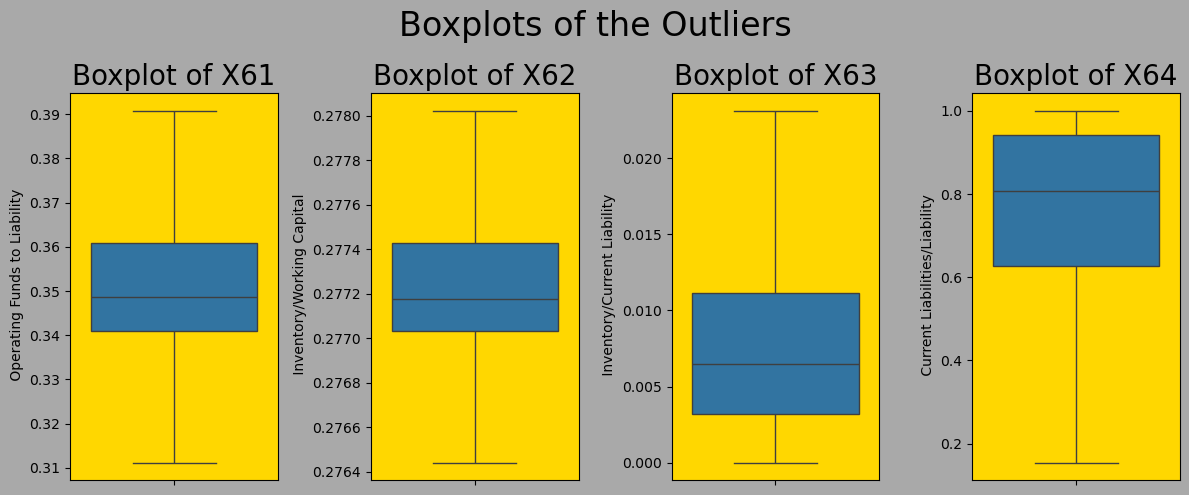

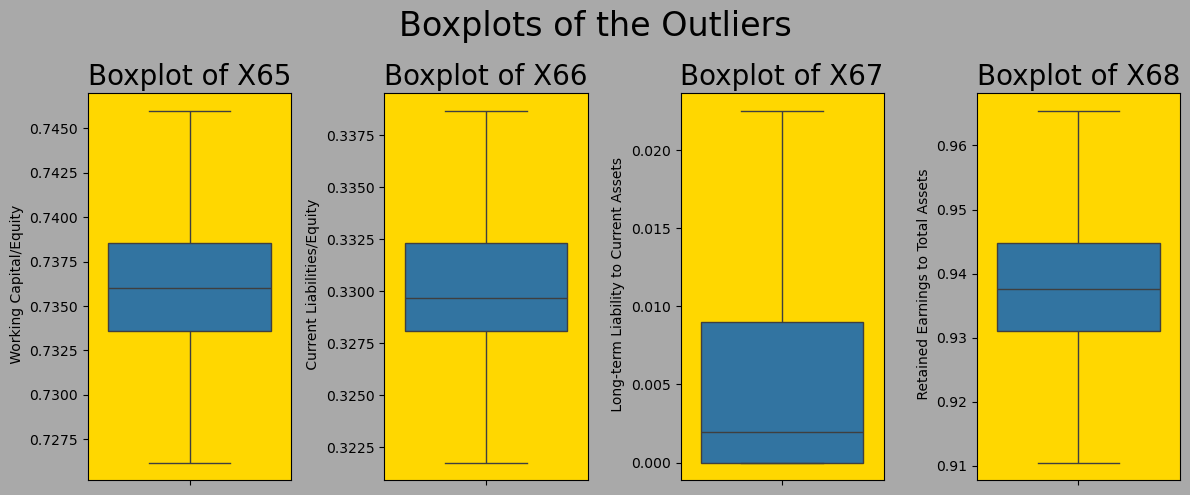

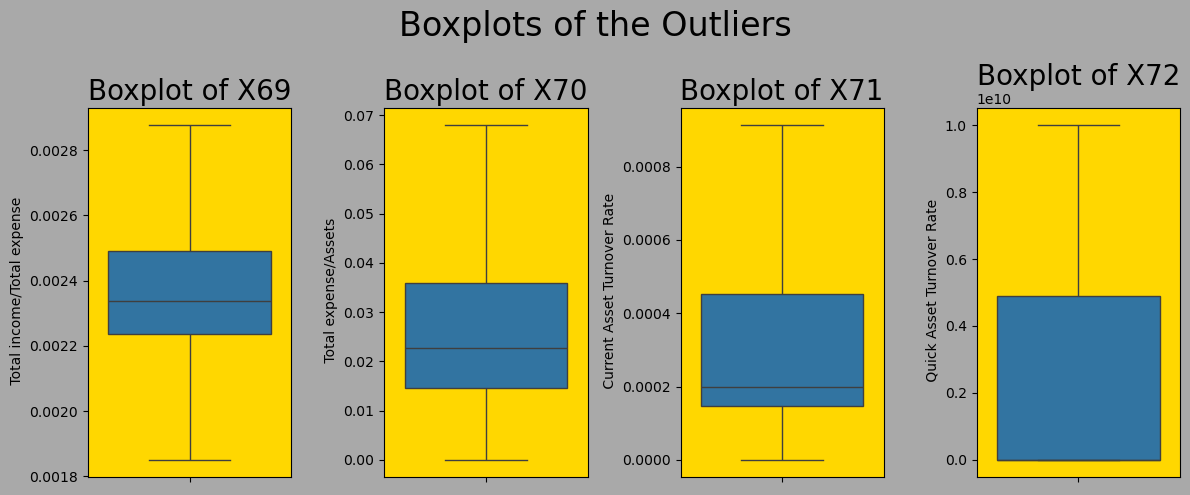

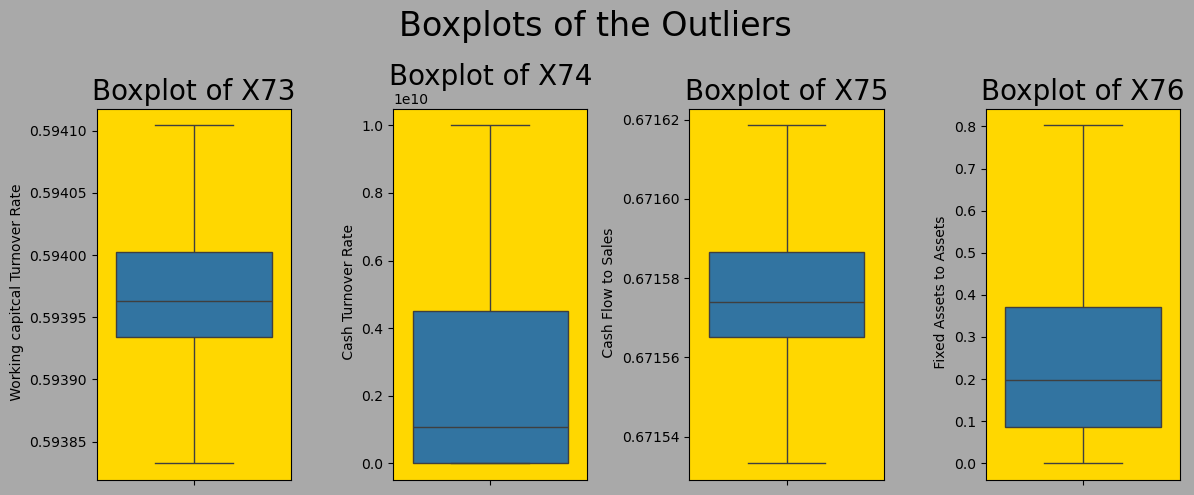

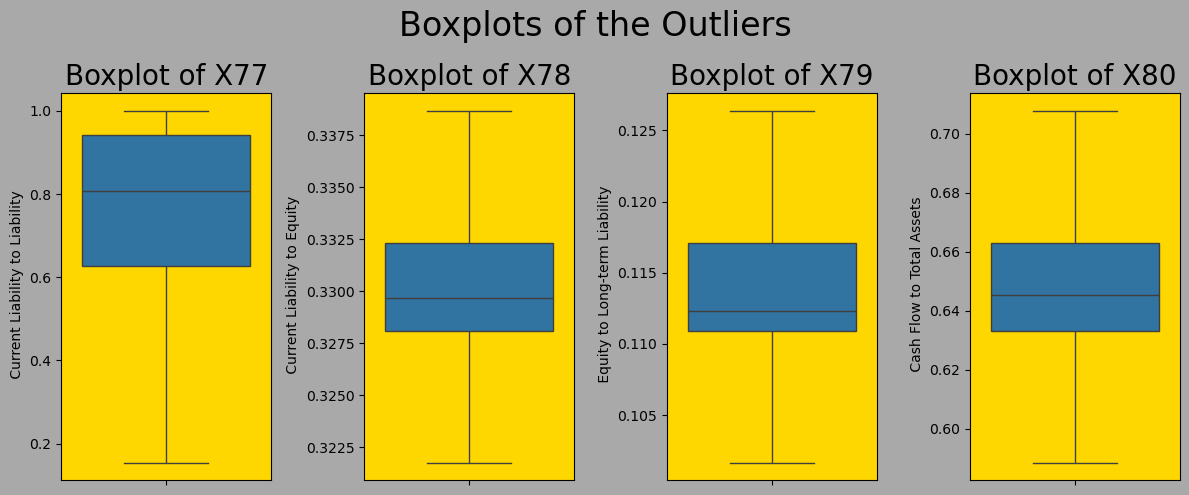

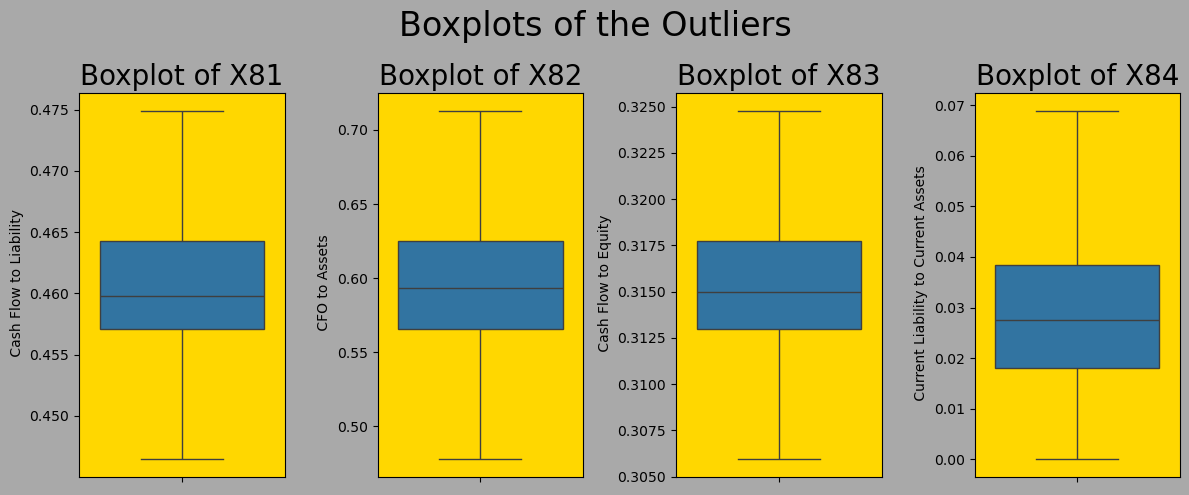

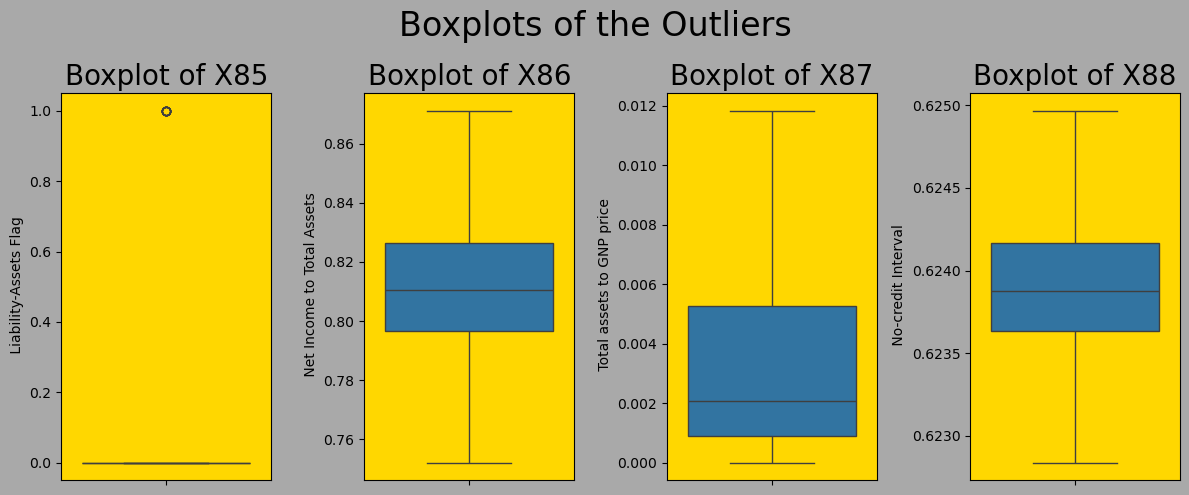

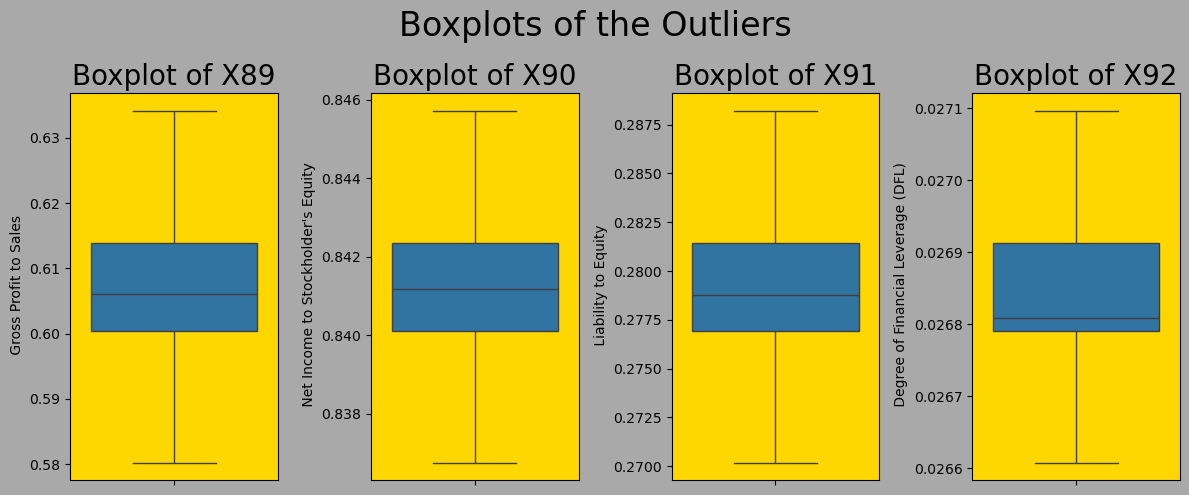

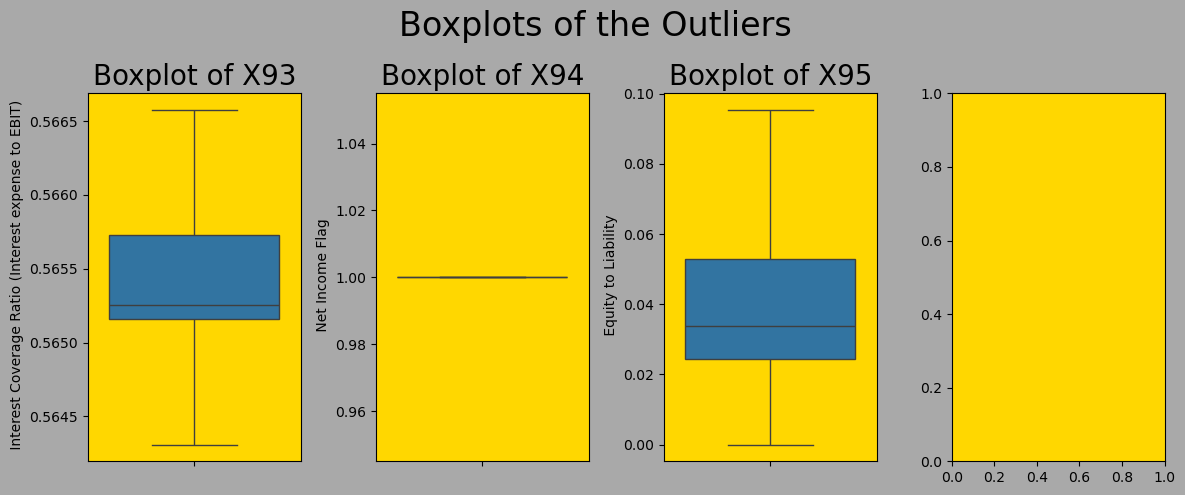

In [36]:
for i in range(24):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(data2[features[i*4]],ax=ax1)
    ax1.set_title(f'Boxplot of X{i*4+1}',fontsize=20)
    ax1.set_facecolor('gold')
    ax2 = sns.boxplot(data2[features[i*4+1]],ax=ax2)
    ax2.set_title(f'Boxplot of X{i*4+2}',fontsize=20)
    ax2.set_facecolor('gold')
    ax3 = sns.boxplot(data2[features[i*4+2]],ax=ax3)
    ax3.set_title(f'Boxplot of X{i*4+3}',fontsize=20)
    ax3.set_facecolor('gold')
    if i < 23:
        ax4 = sns.boxplot(data2[features[i*4+3]],ax=ax4)
        ax4.set_title(f'Boxplot of X{i*4+4}',fontsize=20)
        ax4.set_facecolor('gold')
    else:    
        ax4.set_facecolor('gold')
    
    fig.suptitle("Boxplots of the Outliers",fontsize=24)    
    
    plt.tight_layout()
    fig.set_facecolor('darkgrey')



The boxplots above show that the outliers capping procedure was successful.


4.2 Resampling

The data is highly imbalanced because around 97% of the target values belong to one of the binary classes. A 50-50 split of these classes in the test data is needed in order to obtain more accurate predictions.



Train-Test Splitting




I am defining the X and y variables.


In [37]:


X = data2.drop('Bankrupt?',axis=1)
y = data2['Bankrupt?']



In [46]:
#then, I am performing the train-test splitting.
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)


Oversampling



I will start with the oversampling procedure. It consists in copying the rows of the dataset with a target variable value belonging to the minority class, so that their number is the same as that of the rows with a target variable value belonging to the majority class.


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# Balancing the data
X_overSampled,y_overSampled = smote.fit_resample(X_train,y_train)



In [51]:
len(X_train),len(X_overSampled)

(4773, 9238)

Undersampling



Undersampling is the opposite to oversampling. In this second case, the number of rows with a target variable value belonging to the majority class is cut, so that their number is the same as that of the rows with a target variable value belonging to the minority class.


In [52]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42,sampling_strategy='majority')

# Balancing the data
X_underSampled,y_underSampled = rus.fit_resample(X_train,y_train)

In [53]:
len(X_train), len(X_underSampled)

(4773, 308)

5. Binary Classification with Feature Selection

I am using a feature selection method, where I will 'manually' select those features that have a high relative feature importance (calculate by means of a random forest classifier) and do not have a strong correlation with other variables

In [54]:
#Scaling

X_test_under = X_test.copy()

### Undersampled data ###
LABELS = X_underSampled.columns

## Scaling ##       
mm_scaler = MinMaxScaler() 

# Apply Min-Max Scaling
X_underSampled[LABELS] = mm_scaler.fit_transform(X_underSampled[LABELS])
X_test_under[LABELS] = mm_scaler.transform(X_test_under[LABELS])

In [55]:
X_test_over = X_test.copy()

### Oversampled data ###
LABELS = X_overSampled.columns

## Scaling ##       
mm_scaler = MinMaxScaler() 

# Apply Min-Max Scaling
X_overSampled[LABELS] = mm_scaler.fit_transform(X_overSampled[LABELS])
X_test_over[LABELS] = mm_scaler.transform(X_test_over[LABELS])



Feature Importance



I am calculating the relative importance of the predictors by means of a random forest classifier. Although this method is not 100% reliable, it can give indications about the most/less useful features in the classification stage. I will use undersampled train data.


In [56]:
# Random Forest Model
random_forest = RandomForestClassifier(random_state=1,max_depth=4)
random_forest.fit(X_underSampled,y_underSampled)

importances = pd.DataFrame({'feature':X_underSampled.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False) 

importances

feature  importance
18            Persistent EPS in the Last Four Seasons       0.068
68                         Total income/Total expense       0.051
42              Net profit before tax/Paid-in capital       0.048
2    ROA(B) before interest and depreciation after...       0.042
37                                   Net worth/Assets       0.042
..                                                ...         ...
11              Research and development expense rate       0.001
40                   Contingent liabilities/Net worth       0.001
93                              Liability-Assets Flag       0.000
47                    Inventory Turnover Rate (times)       0.000
94                                    Net Income Flag       0.000

[95 rows x 2 columns]



I am keeping the features with a relative importance > 2% only.


In [57]:
importances = importances[importances['importance'] > 0.02]

importances

feature  importance
18            Persistent EPS in the Last Four Seasons       0.068
68                         Total income/Total expense       0.051
42              Net profit before tax/Paid-in capital       0.048
2    ROA(B) before interest and depreciation after...       0.042
37                                   Net worth/Assets       0.042
35                         Total debt/Total net worth       0.042
22           Per Share Net profit before tax (Yuan ¥)       0.036
1              ROA(A) before interest and % after tax       0.034
39                               Borrowing dependency       0.033
36                                       Debt ratio %       0.033
84                         Net Income to Total Assets       0.032
89                                Liability to Equity       0.031
92                                Equity to Liability       0.030
9                Continuous interest rate (after tax)       0.029
67                  Retained Earnings to Total Assets       0.024
0    ROA(C) before interest and depreciation befor...       0.021



Dropping some features





I am turning the features that are displayed in the feature column into a list.


In [58]:


list_features = importances['feature'].to_list()

list_features



[' Persistent EPS in the Last Four Seasons',
 ' Total income/Total expense',
 ' Net profit before tax/Paid-in capital',
 ' ROA(B) before interest and depreciation after tax',
 ' Net worth/Assets',
 ' Total debt/Total net worth',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' ROA(A) before interest and % after tax',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Net Income to Total Assets',
 ' Liability to Equity',
 ' Equity to Liability',
 ' Continuous interest rate (after tax)',
 ' Retained Earnings to Total Assets',
 ' ROA(C) before interest and depreciation before interest']



Some of these features have strong mutual correlations, like ROA(C) vs ROA(B). This is why some of them must be dropped. I will drop those that are here in the list below and also have lower feature importance.

    ROA(C) before interest and depreciation before interest -- ROA(A) before interest and % after tax ; R = 0.940
    ROA(C) before interest and depreciation before interest -- ROA(B) before interest and depreciation after tax ; R = 0.987
    ROA(A) before interest and % after tax -- ROA(B) before interest and depreciation after tax ; R = 0.956
    ROA(A) before interest and % after tax -- Net Income to Total Assets ; R = 0.962
    ROA(B) before interest and depreciation after tax -- Net Income to Total Assets ; R = 0.912
    Operating Gross Margin -- Realized Sales Gross Margin ; R = 1.000
    Operating Gross Margin -- Gross Profit to Sales ; R = 1.000
    Realized Sales Gross Margin -- Gross Profit to Sales ; R = 1.000
    Operating Profit Rate -- Pre-tax net Interest Rate ; R = 0.916
    Operating Profit Rate -- Continuous interest rate (after tax) ; R = 0.916
    Pre-tax net Interest Rate -- After-tax net Interest Rate ; R = 0.986
    Pre-tax net Interest Rate -- Continuous interest rate (after tax) ; R = 0.994
    After-tax net Interest Rate -- Continuous interest rate (after tax) ; R = 0.984
    Net Value Per Share (B) -- Net Value Per Share (A) ; R = 0.999
    Net Value Per Share (B) -- Net Value Per Share (C) ; R = 0.999
    Net Value Per Share (A) -- Net Value Per Share (C) ; R = 1.000
    Persistent EPS in the Last Four Seasons -- Per Share Net profit before tax (Yuan ¥) ; R = 0.956
    Persistent EPS in the Last Four Seasons -- Net profit before tax/Paid-in capital ; R = 0.959
    Operating Profit Per Share (Yuan ¥) -- Operating profit/Paid-in capital ; R = 0.999
    Per Share Net profit before tax (Yuan ¥) -- Net profit before tax/Paid-in capital ; R = 0.963
    After-tax Net Profit Growth Rate -- Regular Net Profit Growth Rate ; R = 0.996
    Debt ratio % -- Net worth/Assets ; R = -1.000
    Borrowing dependency -- Liability to Equity ; R = 0.956
    Current Liabilities/Liability -- Current Liability to Liability ; R = 1.000
    Current Liabilities/Equity -- Current Liability to Equity ; R = 1.000
    Current Liabilities/Equity -- Liability to Equity ; R = 0.964
    Working capitcal Turnover Rate -- Cash Flow to Sales ; R = 0.948
    Current Liability to Equity -- Liability to Equity ; R = 0.964

I will drop:

    ROA(A)
    ROA(C)
    Per Share Net profit before tax (Yuan ¥)
    Net profit before tax/Paid-in capital
    Debt ratio %
    Liability to Equity



In [59]:
list_remove = [' ROA(A) before interest and % after tax',
               ' ROA(C) before interest and depreciation before interest',
               ' Per Share Net profit before tax (Yuan ¥)',
               ' Net profit before tax/Paid-in capital',
               ' Debt ratio %',
               ' Liability to Equity']

list_features = list(set(list_features) - set(list_remove))

list_features

[' Continuous interest rate (after tax)',
 ' Persistent EPS in the Last Four Seasons',
 ' Borrowing dependency',
 ' Retained Earnings to Total Assets',
 ' Equity to Liability',
 ' Net worth/Assets',
 ' ROA(B) before interest and depreciation after tax',
 ' Total debt/Total net worth',
 ' Net Income to Total Assets',
 ' Total income/Total expense']



Then, I am keeping in the X matrix only the features that are displayed in this list.


In [60]:
X_train_US2 = X_underSampled[X_underSampled.columns.intersection(list_features)]
X_test_US2  = X_test_under[X_test_under.columns.intersection(list_features)]

X_train_OS2 = X_overSampled[X_overSampled.columns.intersection(list_features)]
X_test_OS2  = X_test_over[X_test_over.columns.intersection(list_features)]

X_test_US2.head()

ROA(B) before interest and depreciation after tax  \
4893                                           0.611929   
1462                                           0.913389   
1645                                           0.695301   
1512                                           0.338495   
3966                                           0.555876   

      Continuous interest rate (after tax)  \
4893                              0.701499   
1462                              1.000000   
1645                              0.540175   
1512                              0.287261   
3966                              0.385512   

      Persistent EPS in the Last Four Seasons  Total debt/Total net worth  \
4893                                 0.856373                    0.122562   
1462                                 0.984804                    0.143285   
1645                                 1.000000                    0.466664   
1512                                 0.316176                    0.500956   
3966                                 0.378922                    0.188284   

      Net worth/Assets  Borrowing dependency  \
4893          0.765270              0.356606   
1462          0.736839              0.370671   
1645          0.448599              0.542468   
1512          0.428836              0.737860   
3966          0.680670              0.469443   

      Retained Earnings to Total Assets  Total income/Total expense  \
4893                           0.722932                    1.000000   
1462                           0.726007                    1.000000   
1645                           0.670259                    0.734747   
1512                           0.352870                    0.347326   
3966                           0.633774                    0.380963   

      Net Income to Total Assets  Equity to Liability  
4893                    0.684421             0.632149  
1462                    0.846002             0.559646  
1645                    0.678477             0.231855  
1512                    0.305206             0.221057  
3966                    0.373964             0.452330



Binary Classification with a Random Forest Classifier on Undersampled Data




Now, I am performing a binary classification with a random forest classifier on undersampled data.

I am defining a function to get the most common scores on the classification outcome.


In [61]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='macro')
    recall    = recall_score(y_test_data,preds,average='macro')
    f1        = f1_score(y_test_data,preds,average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table



I am fitting the model on the train data, calculating the scores on the train data ...


In [62]:
random_forest = RandomForestClassifier(class_weight='balanced')

random_forest.fit(X_train_US2,y_underSampled)

# Use the model to predict on train data
rf_train_preds = random_forest.predict(X_train_US2)

rf_train_results = get_test_scores('RF (train, undersampled)',rf_train_preds,y_underSampled)
rf_train_results

model  precision  recall   F1  accuracy
0  RF (train, undersampled)        1.0     1.0  1.0       1.0



... then, I am calculating the scores on the test data.


In [63]:
# Use the model to predict on test data
rf_test_preds = random_forest.predict(X_test_US2)

rf_test_results = get_test_scores('RF (test, undersampling)',rf_test_preds,y_test)
rf_test_results

model  precision    recall        F1  accuracy
0  RF (test, undersampling)   0.576244  0.843182  0.592463  0.852395



Precision and F1 scores are not very good. Let's try to improve them.




Binary Classification with a XGBoost Classifier on Undersampled Data




I am doing the same as before, but this time I will use XGBoost instead of a random forest classifier.



In [64]:
# Instantiate the XGBoost classifier
xgb1 = XGBClassifier(objective='binary:logistic',random_state=42)

xgb1.fit(X_train_US2,y_underSampled)

# Use the model to predict on train data
xgb_train_preds = xgb1.predict(X_train_US2)

xgb_train_results = get_test_scores('XGB (train, undersampled)',xgb_train_preds,y_underSampled)
xgb_train_results

model  precision  recall   F1  accuracy
0  XGB (train, undersampled)        1.0     1.0  1.0       1.0

In [65]:
# Use the model to predict on test data
xgb_test_preds = xgb1.predict(X_test_US2)

xgb_test_results = get_test_scores('XGB (test, undersampling)',xgb_test_preds,y_test)
xgb_test_results   

model  precision    recall        F1  accuracy
0  XGB (test, undersampling)   0.564901  0.834343  0.566518  0.821114



The results are worse than the random forest ones.


Binary Classification with a XGBoost Classifier (and GridSearch + Cross Validation) on Undersampled Data



I am using a XGBoost classifier with GridSearch and cross validation. This will make it possible to vary the parameter values and find the best combination of them.


In [68]:
# Instantiate the XGBoost classifier
xgb2 = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth':[None,2,3,4,5],'min_child_weight':[4,5,6],'learning_rate': [0.01,0.05,0.1,0.2],
             'n_estimators':[150,200,300]}

# 3. Define a LIST of scoring metrics to capture 
scoring = ['accuracy','precision','recall','f1']  

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb2, cv_params, scoring=scoring, cv=4, refit='accuracy')

# Model fitting on the train data
xgb_cv.fit(X_train_US2, y_underSampled)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [None, 2, 3, 4, 5],
                         'min_child_weight': [4, 5, 6],
                         'n_estimators': [150, 200, 300]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [69]:
# Use the model to predict on the test data
xgb_cv_test_preds = xgb_cv.best_estimator_.predict(X_test_US2)

xgb_cv_test_results = get_test_scores('XGB CV (test, undersampling)',xgb_cv_test_preds,y_test)

xgb_cv_test_results  


model  precision    recall        F1  accuracy
0  XGB CV (test, undersampling)   0.571076  0.842929  0.580622  0.837732



These results are not better than those obtained with the random forest classifier.




Confusion Matrix


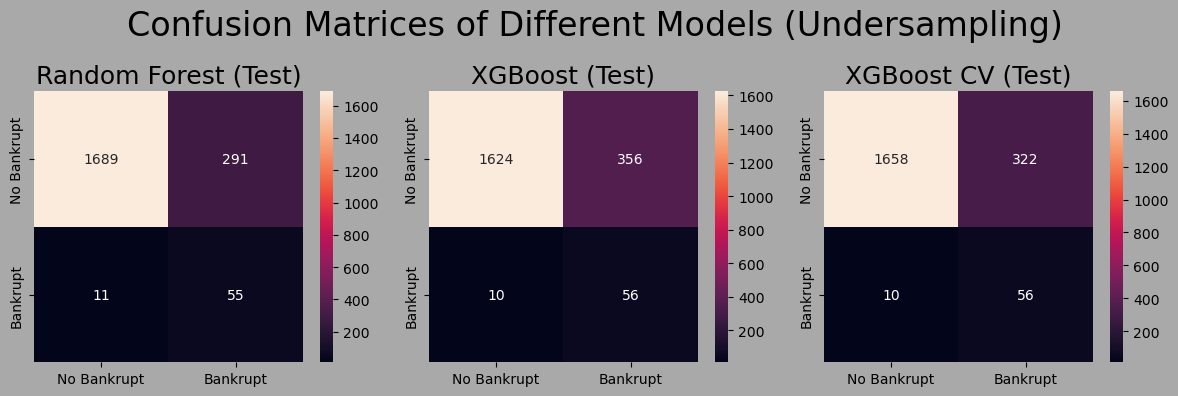

In [70]:
# Generate array of values for confusion matrix
cm_rf_test     = confusion_matrix(y_test,rf_test_preds,labels=random_forest.classes_)
cm_xgb_test    = confusion_matrix(y_test,xgb_test_preds,labels=xgb1.classes_)
cm_xgb_cv_test = confusion_matrix(y_test,xgb_cv_test_preds,labels=xgb_cv.classes_)

### Creating the confusion matrices ###   
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,4))

ax1 = sns.heatmap(cm_rf_test,annot=True,ax=ax1,fmt='.4g')
ax1.xaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax1.yaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax1.set_title('Random Forest (Test)',fontsize=18)

ax2 = sns.heatmap(cm_xgb_test,annot=True,ax=ax2,fmt='.4g')
ax2.xaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax2.yaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax2.set_title('XGBoost (Test)',fontsize=18)

ax3 = sns.heatmap(cm_xgb_cv_test,annot=True,ax=ax3,fmt='.4g')
ax3.xaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax3.yaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax3.set_title('XGBoost CV (Test)',fontsize=18)

fig.suptitle("Confusion Matrices of Different Models (Undersampling)",fontsize=24) 

plt.tight_layout()
fig.set_facecolor('darkgrey')



The random forest classifier provides the best results with undersampling.




Binary Classification with a Random Forest Classifier on Oversampled Data




I am doing basically the same as before, but I will use oversampled instead of undersampled data.


In [72]:
random_forest = RandomForestClassifier(class_weight='balanced')

random_forest.fit(X_train_OS2,y_overSampled)

# Use the model to predict on train data
rf_train_preds = random_forest.predict(X_train_OS2)

rf_train_results = get_test_scores('RF (train, oversampled)',rf_train_preds,y_overSampled)
rf_train_results

model  precision  recall   F1  accuracy
0  RF (train, oversampled)        1.0     1.0  1.0       1.0

In [73]:
# Use the model to predict on test data
rf_test_preds = random_forest.predict(X_test_OS2)

rf_test_over_results = get_test_scores('RF (test, oversampling)',rf_test_preds,y_test)
rf_test_over_results     

model  precision    recall        F1  accuracy
0  RF (test, oversampling)   0.634614  0.791162  0.678454  0.935973

It seems that the use of an oversampled train set improves the results.



Binary Classification with a XGBoost Classifier (and GridSearch + Cross Validation) on Oversampled Data


In [74]:
%%time
xgb_cv.fit(X_train_OS2,y_overSampled)

CPU times: total: 22min 10s
Wall time: 1min 32s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [None, 2, 3, 4, 5],
                         'min_child_weight': [4, 5, 6],
                         'n_estimators': [150, 200, 300]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [75]:
# Use the model to predict on test data
xgb_cv_test_preds = xgb_cv.best_estimator_.predict(X_test_OS2)

xgb_cv_test_over_results = get_test_scores('XGB CV (test, oversampling)',xgb_cv_test_preds,y_test)

xgb_cv_test_over_results 

model  precision    recall       F1  accuracy
0  XGB CV (test, oversampling)   0.634017  0.777273  0.67583  0.937439



Binary Classification with a Random Forest Classifier (and GridSearch + Cross Validation) on Oversampled Data


In [83]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2,3,4,5,None],'max_features': [1.0],'max_samples': [1.0],
             'min_samples_leaf': [2,3,4],'min_samples_split': [2,3,4],'n_estimators': [200,300,400]}

# 3. Define a LIST of scoring metrics to capture 
scoring = ['accuracy','precision','recall','f1'] 

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='accuracy')

# 5. FIT THE MODEL (this was missing!)
rf_cv.fit(X_train_OS2, y_overSampled)  # Use your appropriate training data

# 6. Now you can use the model to predict on test data
rf_grid_test_preds = rf_cv.best_estimator_.predict(X_test_OS2)

rf_grid_test_over_results = get_test_scores('RF Grid (test, oversampling)', rf_grid_test_preds, y_test)

rf_grid_test_over_results

model  precision    recall        F1  accuracy
0  RF Grid (test, oversampling)   0.611687  0.750505  0.648433  0.928152

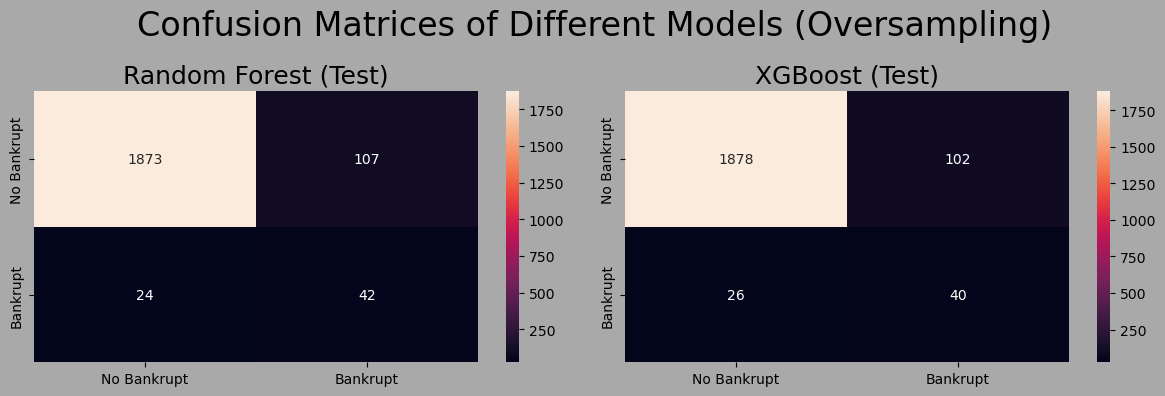

In [84]:
# Generate array of values for confusion matrix
cm_rf2_test     = confusion_matrix(y_test,rf_test_preds,labels=random_forest.classes_)
cm_xgb2_test    = confusion_matrix(y_test,xgb_cv_test_preds,labels=xgb_cv.classes_)
#cm_rf2_cv_test  = confusion_matrix(y_test,rf_grid_test_preds,labels=rf_cv.classes_)

### Creating the confusion matrices ###   
#fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,4))
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))

ax1 = sns.heatmap(cm_rf2_test,annot=True,ax=ax1,fmt='.4g')
ax1.xaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax1.yaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax1.set_title('Random Forest (Test)',fontsize=18)

ax2 = sns.heatmap(cm_xgb2_test,annot=True,ax=ax2,fmt='.4g')
ax2.xaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax2.yaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
ax2.set_title('XGBoost (Test)',fontsize=18)

#ax3 = sns.heatmap(cm_rf2_cv_test,annot=True,ax=ax3,fmt='.4g')
#ax3.xaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
#ax3.yaxis.set_ticklabels(['No Bankrupt','Bankrupt']) 
#ax3.set_title('Random Forest CV (Test)',fontsize=18)

fig.suptitle("Confusion Matrices of Different Models (Oversampling)",fontsize=24) 

plt.tight_layout()
fig.set_facecolor('darkgrey')



Comparison Between the Different Models


In [85]:
#results = pd.concat([rf_test_results,xgb_test_results,xgb_cv_test_results,
#                     rf_test_over_results,xgb_cv_test_over_results,rf_grid_test_over_results],axis=0)
results = pd.concat([rf_test_results,xgb_test_results,xgb_cv_test_results,
                     rf_test_over_results,xgb_cv_test_over_results],axis=0)

results.sort_values(by=['accuracy'],ascending=False)

model  precision    recall        F1  accuracy
0   XGB CV (test, oversampling)   0.634017  0.777273  0.675830  0.937439
0       RF (test, oversampling)   0.634614  0.791162  0.678454  0.935973
0      RF (test, undersampling)   0.576244  0.843182  0.592463  0.852395
0  XGB CV (test, undersampling)   0.571076  0.842929  0.580622  0.837732
0     XGB (test, undersampling)   0.564901  0.834343  0.566518  0.821114